# Getting to know your data
The most difficult thing in life is to know yourself'
This quote belongs to Thales of Miletus. Thales was a Greek/Phonecian philosopher, mathematician and astronomer, which is recognised as the first individual in Western civilisation known to have entertained and engaged in scientific thought (source: https://en.wikipedia.org/wiki/Thales)
I wouldn't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water.


In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16

In [2]:
# Bring the Train data
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')
# Generate a UniqueID for each record
df_train.insert(1,'unique_id','train_' + df_train.Id.astype(str))
df_test.insert(1,'unique_id','test_' + df_train.Id.astype(str))
# Remember where it come from
df_train.insert(2,'OriginFile','train')
df_test.insert(2,'OriginFile','test')

FileNotFoundError: File b'train.csv' does not exist

In [ ]:
# Check the column decorations
df_train.columns

In [ ]:
df_test.columns

In [ ]:
df_all = pd.concat((df_train.loc[:,'unique_id':'SaleCondition'],
                    df_test.loc[:,'unique_id':'SaleCondition']))

In [ ]:
df_all.head(20)

In [ ]:
df_all.tail(10)

In [ ]:
df_all.describe().T

In [ ]:
df_all.columns[2:]

In [11]:
df_all.select_dtypes(include=['object']).columns[2:]

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
df_all=pd.get_dummies(df_all,columns=df_all.select_dtypes(include=['object']).columns[2:])

In [13]:
df_all.head(10).T

,0,1,2,3,4,5,6,7,8,9
unique_id,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10
OriginFile,train,train,train,train,train,train,train,train,train,train
MSSubClass,60,20,60,70,60,50,20,60,50,190
LotFrontage,65,80,68,60,84,85,75,NaN,51,50
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420
OverallQual,7,6,7,7,8,5,8,7,7,5
OverallCond,5,8,5,5,5,5,5,6,5,6
YearBuilt,2003,1976,2001,1915,2000,1993,2004,1973,1931,1939
YearRemodAdd,2003,1976,2002,1970,2000,1995,2005,1973,1950,1950
MasVnrArea,196,0,162,0,350,0,186,240,0,0


In [14]:
#df_all_numeric=df_all._get_numeric_data()

In [15]:
df_all.select_dtypes(exclude=['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=288)

In [16]:
df_all.select_dtypes(include=['object']).columns

Index(['unique_id', 'OriginFile'], dtype='object')

In [17]:
df_all_numeric_robust=pd.DataFrame.from_items([ ('median',    df_all.select_dtypes(exclude=['object']).median()),
                                                ('average',   df_all.select_dtypes(exclude=['object']).mean()),
                                                ('mode',      df_all.select_dtypes(exclude=['object']).mode().values[0]),
                                                ('stddev',    df_all.select_dtypes(exclude=['object']).std()),
                                                ('skew',      df_all.select_dtypes(exclude=['object']).skew()),
                                                ('kurt',      df_all.select_dtypes(exclude=['object']).kurt()),
                                                ('exc kurt',  df_all.select_dtypes(exclude=['object']).kurt()-3),
                                                ('min',       df_all.select_dtypes(exclude=['object']).min()),
                                                ('max',       df_all.select_dtypes(exclude=['object']).max()),
                                                ('NaN#',      df_all.select_dtypes(exclude=['object']).isnull().sum())
                                              ],
                                              orient='index', columns=df_all.select_dtypes(exclude=['object']).columns)

In [18]:
df_all_numeric_robust.T

,median,average,mode,stddev,skew,kurt,exc kurt,min,max,NaN#
MSSubClass,50.0,57.137718,20.0,42.517628,1.376165,1.457827,-1.542173,20.0,190.0,0.0
LotFrontage,68.0,69.305795,60.0,23.344905,1.503278,11.295921,8.295921,21.0,313.0,486.0
LotArea,9453.0,10168.114080,9600.0,7886.996359,12.829025,264.952310,261.952310,1300.0,215245.0,0.0
OverallQual,6.0,6.089072,5.0,1.409947,0.197212,0.067219,-2.932781,1.0,10.0,0.0
OverallCond,5.0,5.564577,5.0,1.113131,0.570605,1.479447,-1.520553,1.0,9.0,0.0
YearBuilt,1973.0,1971.312778,2005.0,30.291442,-0.600114,-0.511317,-3.511317,1872.0,2010.0,0.0
YearRemodAdd,1993.0,1984.264474,1950.0,20.894344,-0.451252,-1.346431,-4.346431,1950.0,2010.0,0.0
MasVnrArea,0.0,102.201312,0.0,179.334253,2.602589,9.254343,6.254343,0.0,1600.0,23.0
BsmtFinSF1,368.5,441.423235,0.0,455.610826,1.425722,6.904832,3.904832,0.0,5644.0,1.0
BsmtFinSF2,0.0,49.582248,0.0,169.205611,4.147456,18.836540,15.836540,0.0,1526.0,1.0


## Filling NaN and Missing Data

In [19]:
df_all_numeric_robust.T.sort_values('NaN#', ascending=False).head(20)

,median,average,mode,stddev,skew,kurt,exc kurt,min,max,NaN#
LotFrontage,68.0,69.305795,60.0,23.344905,1.503278,11.295921,8.295921,21.0,313.0,486.0
GarageYrBlt,1979.0,1978.113406,2005.0,25.574285,-0.382150,1.809845,-1.190155,1895.0,2207.0,159.0
MasVnrArea,0.0,102.201312,0.0,179.334253,2.602589,9.254343,6.254343,0.0,1600.0,23.0
BsmtHalfBath,0.0,0.061364,0.0,0.245687,3.932018,14.848079,11.848079,0.0,2.0,2.0
BsmtFullBath,0.0,0.429894,0.0,0.524736,0.624062,-0.735693,-3.735693,0.0,3.0,2.0
BsmtFinSF1,368.5,441.423235,0.0,455.610826,1.425722,6.904832,3.904832,0.0,5644.0,1.0
TotalBsmtSF,989.5,1051.777587,0.0,440.766258,1.162882,9.151099,6.151099,0.0,6110.0,1.0
BsmtUnfSF,467.0,560.772104,0.0,439.543659,0.919824,0.403617,-2.596383,0.0,2336.0,1.0
BsmtFinSF2,0.0,49.582248,0.0,169.205611,4.147456,18.836540,15.836540,0.0,1526.0,1.0
GarageCars,2.0,1.766621,2.0,0.761624,-0.218373,0.238198,-2.761802,0.0,5.0,1.0


In [20]:
for col in ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']:
    df_all[col]=df_all[col].fillna(df_all[col].median())

In [21]:
for col in ['GarageCars','GarageArea']:
    df_all[col]=df_all[col].fillna(df_all[col].min())

In [22]:
df_all['GarageYrBlt']=df_all['GarageYrBlt'].fillna(df_all['YearBuilt'])

In [23]:
df_all_numeric_robust=pd.DataFrame.from_items([ ('median',    df_all.select_dtypes(exclude=['object']).median()),
                                                ('average',   df_all.select_dtypes(exclude=['object']).mean()),
                                                ('mode',      df_all.select_dtypes(exclude=['object']).mode().values[0]),
                                                ('stddev',    df_all.select_dtypes(exclude=['object']).std()),
                                                ('skew',      df_all.select_dtypes(exclude=['object']).skew()),
                                                ('kurt',      df_all.select_dtypes(exclude=['object']).kurt()),
                                                ('exc kurt',  df_all.select_dtypes(exclude=['object']).kurt()-3),
                                                ('min',       df_all.select_dtypes(exclude=['object']).min()),
                                                ('max',       df_all.select_dtypes(exclude=['object']).max()),
                                                ('NaN#',      df_all.select_dtypes(exclude=['object']).isnull().sum())
                                              ],
                                              orient='index', columns=df_all.select_dtypes(exclude=['object']).columns)
df_all_numeric_robust.T

,median,average,mode,stddev,skew,kurt,exc kurt,min,max,NaN#
MSSubClass,50.0,57.137718,20.0,42.517628,1.376165,1.457827,-1.542173,20.0,190.0,0.0
LotFrontage,68.0,69.088386,68.0,21.317898,1.675713,14.197031,11.197031,21.0,313.0,0.0
LotArea,9453.0,10168.114080,9600.0,7886.996359,12.829025,264.952310,261.952310,1300.0,215245.0,0.0
OverallQual,6.0,6.089072,5.0,1.409947,0.197212,0.067219,-2.932781,1.0,10.0,0.0
OverallCond,5.0,5.564577,5.0,1.113131,0.570605,1.479447,-1.520553,1.0,9.0,0.0
YearBuilt,1973.0,1971.312778,2005.0,30.291442,-0.600114,-0.511317,-3.511317,1872.0,2010.0,0.0
YearRemodAdd,1993.0,1984.264474,1950.0,20.894344,-0.451252,-1.346431,-4.346431,1950.0,2010.0,0.0
MasVnrArea,0.0,101.396026,0.0,178.854579,2.614936,9.336415,6.336415,0.0,1600.0,0.0
BsmtFinSF1,368.5,441.398253,0.0,455.534750,1.426111,6.908362,3.908362,0.0,5644.0,0.0
BsmtFinSF2,0.0,49.565262,0.0,169.179104,4.148275,18.844397,15.844397,0.0,1526.0,0.0


In [24]:
df_all_numeric_robust.T.sort_values('NaN#', ascending=False).head()

,median,average,mode,stddev,skew,kurt,exc kurt,min,max,NaN#
MSSubClass,50.0,57.137718,20.0,42.517628,1.376165,1.457827,-1.542173,20.0,190.0,0.0
LotFrontage,68.0,69.088386,68.0,21.317898,1.675713,14.197031,11.197031,21.0,313.0,0.0
BsmtFinType1_GLQ,0.0,0.290853,0.0,0.454234,0.921510,-1.151609,-4.151609,0.0,1.0,0.0
BsmtFinType1_BLQ,0.0,0.092155,0.0,0.289294,2.821523,5.965078,2.965078,0.0,1.0,0.0
BsmtFinType1_ALQ,0.0,0.146968,0.0,0.354135,1.995138,1.981933,-1.018067,0.0,1.0,0.0


In [25]:
#for col in df_all_numeric.columns:
#    print("Plotting {}".format(col))
#    plt.figure()
#    df_all_numeric[col].plot.hist(title=col)
#print("Done")

Find all skewed and high kurtosis features

In [26]:
df_all_numeric_robust.T[(df_all_numeric_robust.T['skew'] > 0.95) & 
                        (df_all_numeric_robust.T['kurt'] > 3.95) & 
                        (df_all_numeric_robust.T['min']  > 0)]

,median,average,mode,stddev,skew,kurt,exc kurt,min,max,NaN#
LotFrontage,68.0,69.088386,68.0,21.317898,1.675713,14.197031,11.197031,21.0,313.0,0.0
LotArea,9453.0,10168.114080,9600.0,7886.996359,12.829025,264.952310,261.952310,1300.0,215245.0,0.0
1stFlrSF,1082.0,1159.581706,864.0,392.362079,1.470360,6.956479,3.956479,334.0,5095.0,0.0
GrLivArea,1444.0,1500.759849,864.0,506.051045,1.270010,4.121604,1.121604,334.0,5642.0,0.0


In [27]:
for very_skewed in df_all_numeric_robust.T[(df_all_numeric_robust.T['skew'] > 0.95) & 
                        (df_all_numeric_robust.T['kurt'] > 3.95) & 
                        (df_all_numeric_robust.T['min']  > 0)].index:
    print("col {}".format(very_skewed))
    df_all[very_skewed] = np.log10(df_all[very_skewed])

col LotFrontage
col LotArea
col 1stFlrSF
col GrLivArea


In [28]:
df_all_numeric_robust=pd.DataFrame.from_items([ ('median',    df_all.select_dtypes(exclude=['object']).median()),
                                                ('average',   df_all.select_dtypes(exclude=['object']).mean()),
                                                ('mode',      df_all.select_dtypes(exclude=['object']).mode().values[0]),
                                                ('stddev',    df_all.select_dtypes(exclude=['object']).std()),
                                                ('skew',      df_all.select_dtypes(exclude=['object']).skew()),
                                                ('kurt',      df_all.select_dtypes(exclude=['object']).kurt()),
                                                ('exc kurt',  df_all.select_dtypes(exclude=['object']).kurt()-3),
                                                ('min',       df_all.select_dtypes(exclude=['object']).min()),
                                                ('max',       df_all.select_dtypes(exclude=['object']).max()),
                                                ('NaN#',      df_all.select_dtypes(exclude=['object']).isnull().sum())
                                              ],
                                              orient='index', columns=df_all.select_dtypes(exclude=['object']).columns)
df_all_numeric_robust.T

,median,average,mode,stddev,skew,kurt,exc kurt,min,max,NaN#
MSSubClass,50.000000,57.137718,20.000000,42.517628,1.376165,1.457827,-1.542173,20.000000,190.000000,0.0
LotFrontage,1.832509,1.818168,1.832509,0.141989,-1.031296,3.199919,0.199919,1.322219,2.495544,0.0
LotArea,3.975570,3.949815,3.982271,0.221475,-0.505542,3.754157,0.754157,3.113943,5.332933,0.0
OverallQual,6.000000,6.089072,5.000000,1.409947,0.197212,0.067219,-2.932781,1.000000,10.000000,0.0
OverallCond,5.000000,5.564577,5.000000,1.113131,0.570605,1.479447,-1.520553,1.000000,9.000000,0.0
YearBuilt,1973.000000,1971.312778,2005.000000,30.291442,-0.600114,-0.511317,-3.511317,1872.000000,2010.000000,0.0
YearRemodAdd,1993.000000,1984.264474,1950.000000,20.894344,-0.451252,-1.346431,-4.346431,1950.000000,2010.000000,0.0
MasVnrArea,0.000000,101.396026,0.000000,178.854579,2.614936,9.336415,6.336415,0.000000,1600.000000,0.0
BsmtFinSF1,368.500000,441.398253,0.000000,455.534750,1.426111,6.908362,3.908362,0.000000,5644.000000,0.0
BsmtFinSF2,0.000000,49.565262,0.000000,169.179104,4.148275,18.844397,15.844397,0.000000,1526.000000,0.0


In [29]:
df_all.head().T

,0,1,2,3,4
unique_id,train_1,train_2,train_3,train_4,train_5
OriginFile,train,train,train,train,train
MSSubClass,60,20,60,70,60
LotFrontage,1.81291,1.90309,1.83251,1.77815,1.92428
LotArea,3.92686,3.98227,4.05115,3.98,4.15412
OverallQual,7,6,7,7,8
OverallCond,5,8,5,5,5
YearBuilt,2003,1976,2001,1915,2000
YearRemodAdd,2003,1976,2002,1970,2000
MasVnrArea,196,0,162,0,350


## What to expect from the data
In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.
In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:
<ul>
<li>Variable - Variable name.
<li>Type - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.
<li>Segment - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').
<li>Expectation - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.
<li>Conclusion - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.
Comments - Any general comments that occured to us.
</ul>

# Analyzing the class or outcome variable
Let's take a look at SalePrice.

In [30]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [31]:
print("Statistical info: \n\tSkew {}\n\tKurt {}\n\tMedian {}\n\tMode {}  ".format(
            df_train['SalePrice'].skew(),
            df_train['SalePrice'].kurt(),
            df_train['SalePrice'].median(),
            df_train['SalePrice'].mode()))

Statistical info: 
	Skew 1.8828757597682129
	Kurt 6.536281860064529
	Median 163000.0
	Mode 0    140000
dtype: int64  


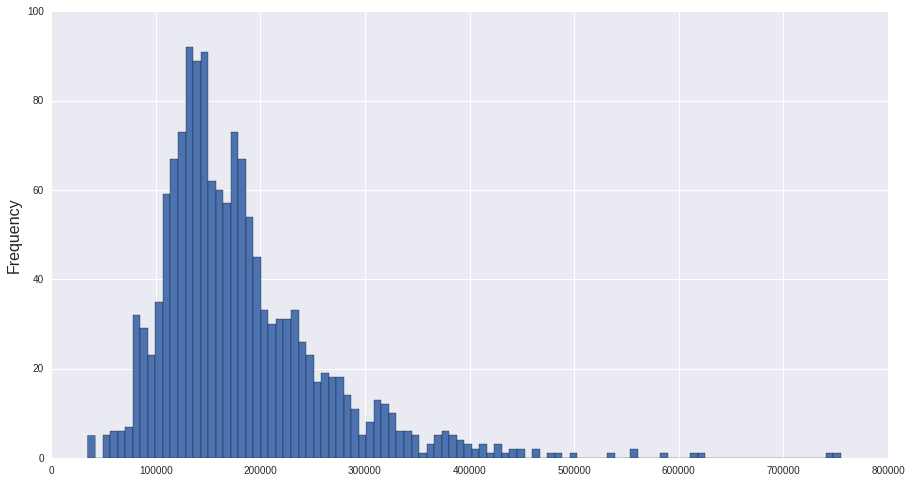

In [32]:
df_train['SalePrice'].plot(kind='hist',figsize=(15,8),bins=100)

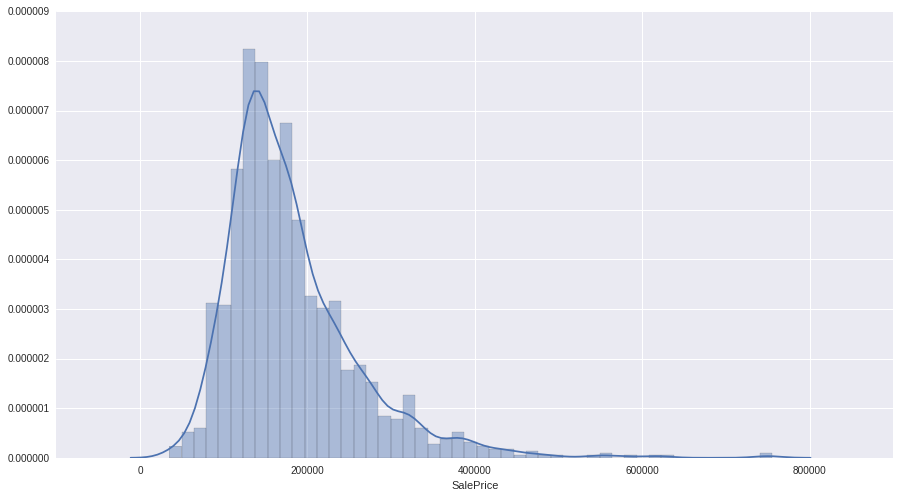

In [33]:
#histogram
sns.set(rc={"figure.figsize": (15, 8)});
sns.distplot(df_train['SalePrice']);

For a normal distribution, skewness should be 0 and kurtosis 3. We are a bit far away! A range between [-1,1] for skewness.
Let's try a log transformation and see what happens...

In [34]:
#applying log transformation
df_train['logSalePrice'] = np.log10(df_train['SalePrice']+1)

In [35]:
df_train['logSalePrice'].describe()

count    1460.000000
mean        5.221982
std         0.173479
min         4.542838
25%         5.113863
50%         5.212190
75%         5.330416
max         5.877948
Name: logSalePrice, dtype: float64

In [36]:
print("Statistical info: \n\tSkew \t{}\n\tKurt \t{}\n\tMedian \t{}\n\tMode \t{}  ".format(
            df_train['logSalePrice'].skew(),
            df_train['logSalePrice'].kurt(),
            df_train['logSalePrice'].median(),
            df_train['logSalePrice'].mode()))

Statistical info: 
	Skew 	0.12134661989686672
	Kurt 	0.8095191557078794
	Median 	5.21219026877911
	Mode 	0    5.146131
dtype: float64  


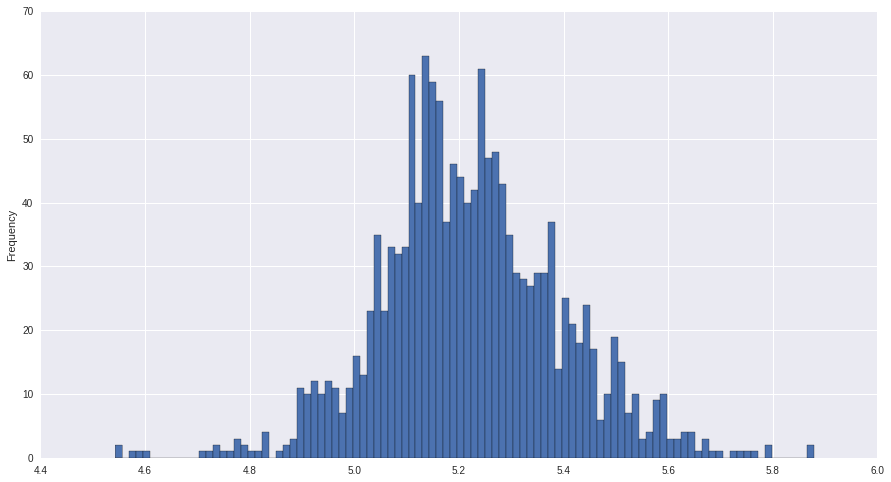

In [37]:
df_train['logSalePrice'].plot(kind='hist',figsize=(15,8),bins=100)

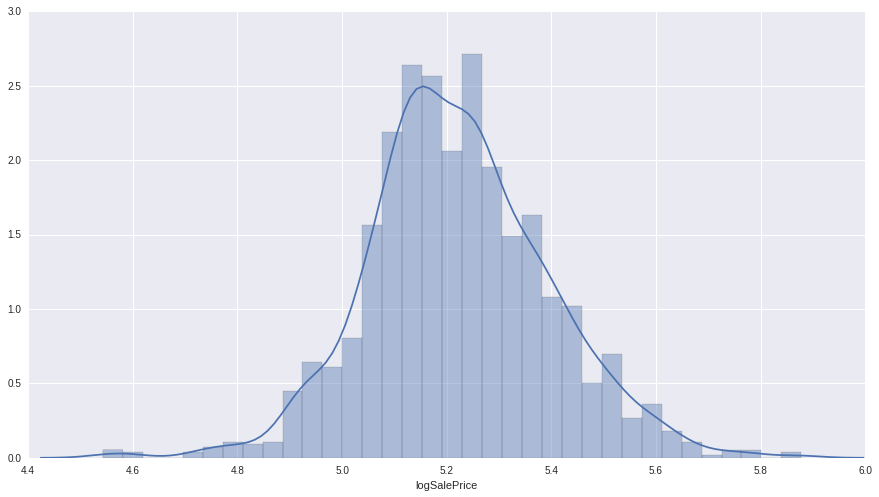

In [38]:
#histogram
sns.set(rc={"figure.figsize": (15, 8)});
sns.distplot(df_train['logSalePrice']);

In [39]:
print("skewness: {}".format(stats.skew(df_train['logSalePrice'],bias=False)))
print("kurtosis: {}".format(stats.kurtosis(df_train['logSalePrice'],bias=False)))

skewness: 0.12134661989686672
kurtosis: 0.8095191557078794


Much better, skewness is improved and kurtosis is not bad. Excess kurtosis, in this case -2.2. Distributions with negative excess kurtosis are called platykurtic distribution meaning flat-topped curve.

# Analisis of combined data and impact on dependent variable

We want to add the new log-normalized variable to all the data we have.

In [40]:
df_all.head(4)

,unique_id,OriginFile,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,train_1,train,60,1.812913,3.926857,7,5,2003,2003,196.0,...,0,0,0,1,0,0,0,0,1,0
1,train_2,train,20,1.903090,3.982271,6,8,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
2,train_3,train,60,1.832509,4.051153,7,5,2001,2002,162.0,...,0,0,0,1,0,0,0,0,1,0
3,train_4,train,70,1.778151,3.980003,7,5,1915,1970,0.0,...,0,0,0,1,1,0,0,0,0,0


In [41]:
del df_all['logSalePrice']

KeyError: 'logSalePrice'

In [42]:
df_all['logSalePrice']=np.NaN

In [43]:
df_all.head(4)

,unique_id,OriginFile,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,logSalePrice
0,train_1,train,60,1.812913,3.926857,7,5,2003,2003,196.0,...,0,0,1,0,0,0,0,1,0,NaN
1,train_2,train,20,1.903090,3.982271,6,8,1976,1976,0.0,...,0,0,1,0,0,0,0,1,0,NaN
2,train_3,train,60,1.832509,4.051153,7,5,2001,2002,162.0,...,0,0,1,0,0,0,0,1,0,NaN
3,train_4,train,70,1.778151,3.980003,7,5,1915,1970,0.0,...,0,0,1,1,0,0,0,0,0,NaN


In [44]:
df_all.loc[df_all['OriginFile'] == 'train','logSalePrice'] = df_train['logSalePrice']
# df_all.head(10)
# df_all.loc[df_all['OriginFile'] == 'train'].tail(10)
# df_all.loc[df_all['OriginFile'] == 'test'].head(10)
# 

Let's see how things correlate

In [45]:
#correlation matrix
corrmat = df_all.corr()
#f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(corrmat, vmax=.8, square=True);


In [46]:
corrmat.loc[corrmat['logSalePrice'] >= 0.4]
#.sort(['logSalePrice'],ascending=0)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,logSalePrice
OverallQual,0.033638,0.173182,0.152137,1.000000,-0.093847,0.597554,0.571532,0.426528,0.281784,-0.042605,...,0.338330,-0.052783,-0.194091,-0.127006,-0.049636,-0.040738,-0.023605,-0.134282,0.333192,0.817185
YearBuilt,0.034409,0.078872,0.035368,0.597554,-0.368477,1.000000,0.612235,0.307520,0.279592,-0.027507,...,0.343880,-0.013920,-0.203944,-0.120524,-0.077741,-0.025116,-0.036093,-0.137934,0.339458,0.586570
YearRemodAdd,0.043315,0.064584,0.043262,0.571532,0.047654,0.612235,1.000000,0.191668,0.152146,-0.061959,...,0.325597,-0.027107,-0.156491,-0.146265,-0.078213,-0.034022,-0.049794,-0.102889,0.323272,0.565608
MasVnrArea,0.006309,0.151067,0.130759,0.426528,-0.133118,0.307520,0.191668,1.000000,0.301427,-0.014580,...,0.147923,-0.022160,-0.092637,-0.041301,-0.018316,-0.019720,-0.017386,-0.065257,0.145046,0.426776
TotalBsmtSF,-0.219893,0.305308,0.330242,0.549157,-0.174014,0.408505,0.298048,0.393662,0.536471,0.089423,...,0.258068,-0.001435,-0.189275,-0.042493,-0.042871,-0.044559,-0.003907,-0.141193,0.258355,0.612134
1stFlrSF,-0.284227,0.436660,0.476887,0.465882,-0.155978,0.309321,0.235064,0.347925,0.420279,0.092298,...,0.195558,-0.001456,-0.146385,-0.031341,-0.025094,0.047641,0.002747,-0.129697,0.195489,0.608947
GrLivArea,0.083772,0.303138,0.365493,0.599186,-0.131555,0.273588,0.341819,0.370961,0.180412,-0.022884,...,0.179162,-0.040306,-0.098893,-0.058626,-0.026062,0.016361,-0.003438,-0.088317,0.175979,0.730255
FullBath,0.139140,0.149272,0.171835,0.528483,-0.215504,0.471169,0.457980,0.254085,0.081566,-0.075314,...,0.237858,-0.012365,-0.136381,-0.092739,0.001782,0.002525,-0.005613,-0.106057,0.229810,0.594771
TotRmsAbvGrd,0.040509,0.317200,0.347994,0.389761,-0.092027,0.114280,0.198250,0.277103,0.052204,-0.048245,...,0.145792,-0.005181,-0.092072,-0.029906,0.012221,0.041497,0.024946,-0.102690,0.140450,0.534422
Fireplaces,-0.055151,0.219420,0.295516,0.390753,-0.030999,0.170680,0.134157,0.273129,0.293095,0.065707,...,0.056647,-0.045318,-0.004243,-0.065465,-0.059386,-0.001943,-0.006249,0.010713,0.060634,0.489450


In [84]:
df_all.tail(10)

,unique_id,OriginFile,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,logSalePrice
1449,test_1450,test,180,1.322219,3.167317,4,6,1970,1970,0.0,...,0,0,1,0,0,0,0,1,0,4.963793
1450,test_1451,test,160,1.322219,3.171434,4,4,1972,1972,0.0,...,0,0,1,0,0,0,0,1,0,5.133542
1451,test_1452,test,20,1.903090,4.126586,5,5,1969,1979,194.0,...,0,0,1,0,0,0,0,1,0,5.458020
1452,test_1453,test,160,1.322219,3.185542,4,5,1970,1970,0.0,...,0,0,1,1,0,0,0,0,0,5.161371
1453,test_1454,test,160,1.322219,3.183555,4,5,1970,1970,0.0,...,0,0,1,0,0,0,0,1,0,4.926862
1454,test_1455,test,160,1.322219,3.286905,4,7,1970,1970,0.0,...,0,0,1,0,0,0,0,1,0,5.267174
1455,test_1456,test,160,1.322219,3.277380,4,5,1970,1970,0.0,...,0,0,1,1,0,0,0,0,0,5.243041
1456,test_1457,test,20,2.204120,4.301030,5,7,1960,1996,0.0,...,0,0,1,1,0,0,0,0,0,5.322221
1457,test_1458,test,85,1.792392,4.018742,5,5,1992,1992,0.0,...,0,0,1,0,0,0,0,1,0,5.425699
1458,test_1459,test,60,1.869232,3.983491,7,5,1993,1994,94.0,...,0,0,1,0,0,0,0,1,0,5.152674


In [67]:
df_train.head()

,Id,unique_id,OriginFile,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logSalePrice
0,1,train_1,train,60,RL,65.0,8450,Pave,NaN,Reg,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5.319108
1,2,train_2,train,20,RL,80.0,9600,Pave,NaN,Reg,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,5.258879
2,3,train_3,train,60,RL,68.0,11250,Pave,NaN,IR1,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,5.349279
3,4,train_4,train,70,RL,60.0,9550,Pave,NaN,IR1,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,5.146131
4,5,train_5,train,60,RL,84.0,14260,Pave,NaN,IR1,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,5.397942


In [70]:
df_full = pd.merge(df_all, df_train, on=['OriginFile', 'unique_id'],how='left')

In [71]:
df_full.head()

,unique_id,OriginFile,MSSubClass_x,LotFrontage_x,LotArea_x,OverallQual_x,OverallCond_x,YearBuilt_x,YearRemodAdd_x,MasVnrArea_x,...,PoolQC,Fence,MiscFeature,MiscVal_y,MoSold_y,YrSold_y,SaleType,SaleCondition,SalePrice,logSalePrice
0,train_1,train,60,1.812913,3.926857,7,5,2003,2003,196.0,...,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0,5.319108
1,train_2,train,20,1.903090,3.982271,6,8,1976,1976,0.0,...,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0,5.258879
2,train_3,train,60,1.832509,4.051153,7,5,2001,2002,162.0,...,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0,5.349279
3,train_4,train,70,1.778151,3.980003,7,5,1915,1970,0.0,...,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0,5.146131
4,train_5,train,60,1.924279,4.154120,8,5,2000,2000,350.0,...,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000.0,5.397942


In [72]:
df_full.tail()

,unique_id,OriginFile,MSSubClass_x,LotFrontage_x,LotArea_x,OverallQual_x,OverallCond_x,YearBuilt_x,YearRemodAdd_x,MasVnrArea_x,...,PoolQC,Fence,MiscFeature,MiscVal_y,MoSold_y,YrSold_y,SaleType,SaleCondition,SalePrice,logSalePrice
2914,test_1455,test,160,1.322219,3.286905,4,7,1970,1970,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2915,test_1456,test,160,1.322219,3.277380,4,5,1970,1970,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2916,test_1457,test,20,2.204120,4.301030,5,7,1960,1996,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2917,test_1458,test,85,1.792392,4.018742,5,5,1992,1992,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2918,test_1459,test,60,1.869232,3.983491,7,5,1993,1994,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


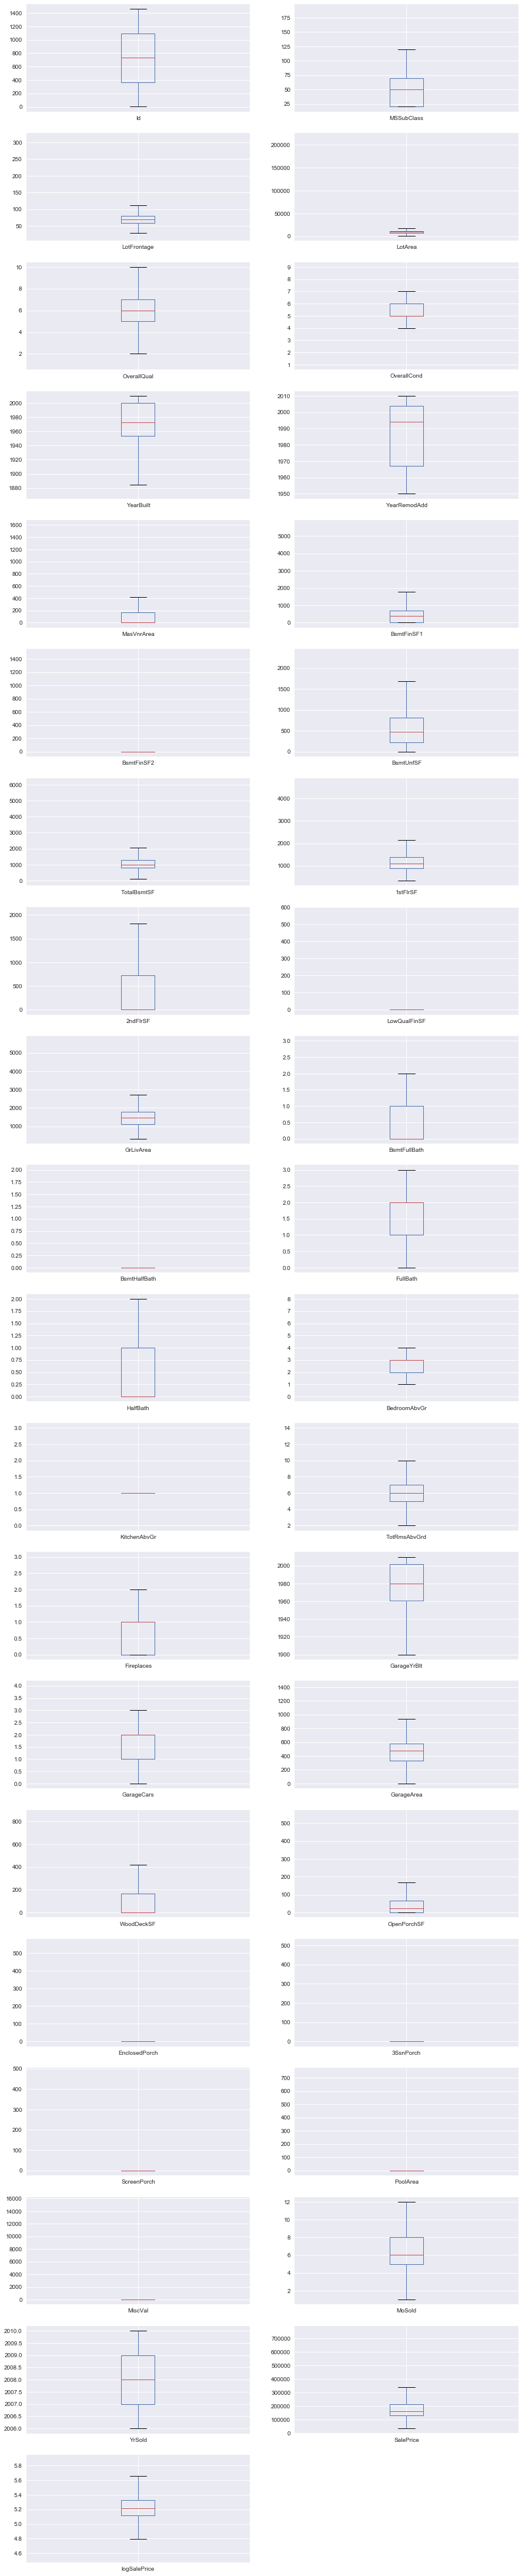

In [82]:
df_train.plot(kind='box',subplots=True, layout=(-1, 2), sharex=False, sharey=False, figsize=(15,80), legend=True)
plt.show()

In [79]:
df_train_numeric=df_train._get_numeric_data()
df_train_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'logSalePrice'],
      dtype='object')

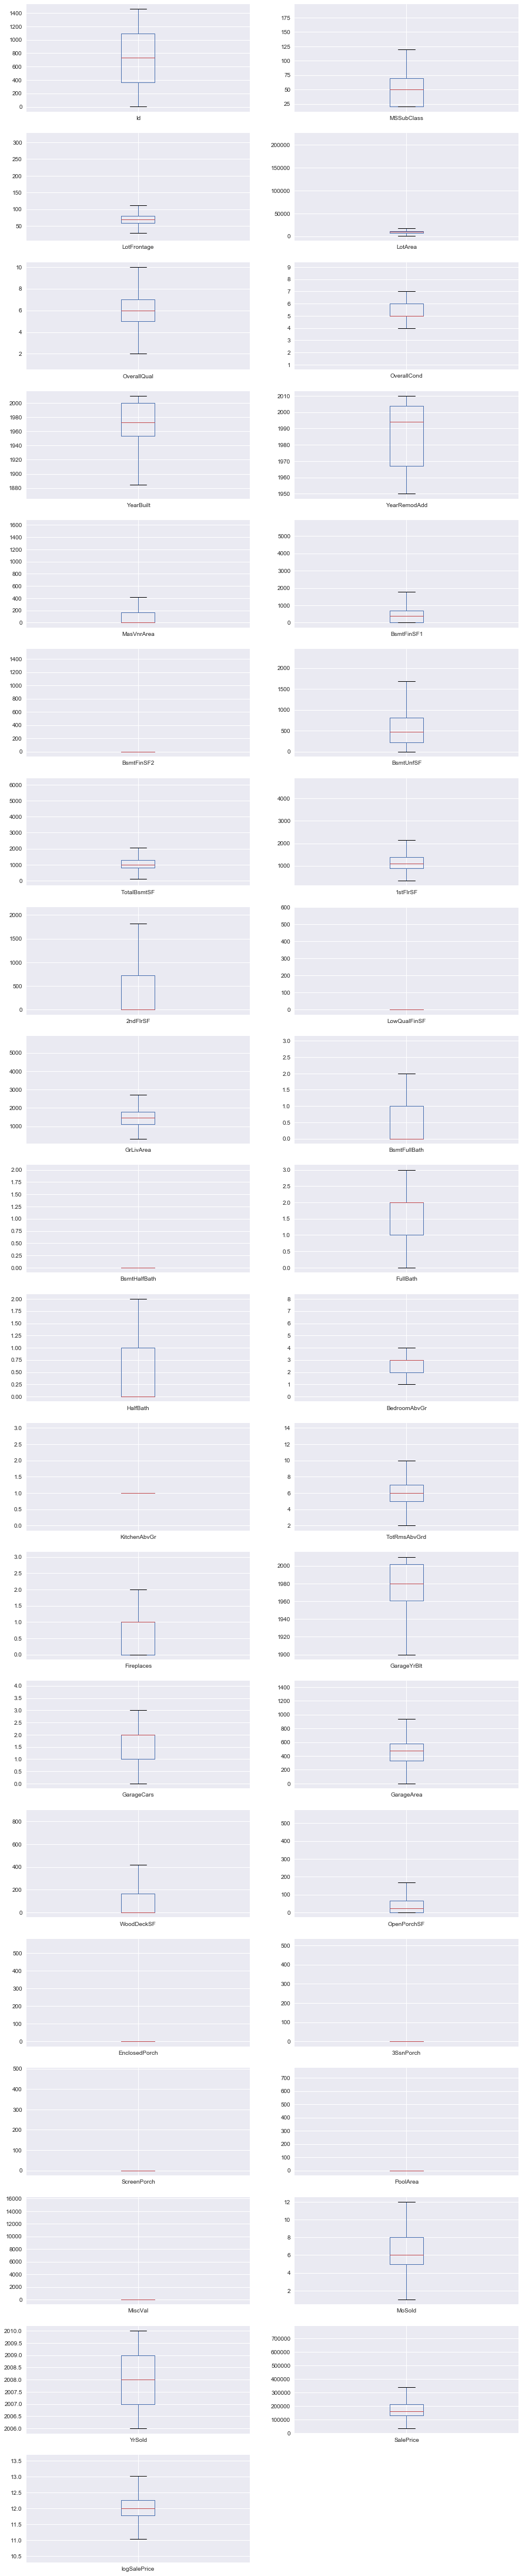

In [80]:
df_train_numeric.plot(kind='box',subplots=True, layout=(-1, 2), sharex=False, sharey=False, figsize=(15,80), legend=True)
plt.show()

In [84]:
df_train_categorical = df_train.select_dtypes(['object'])
df_train_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

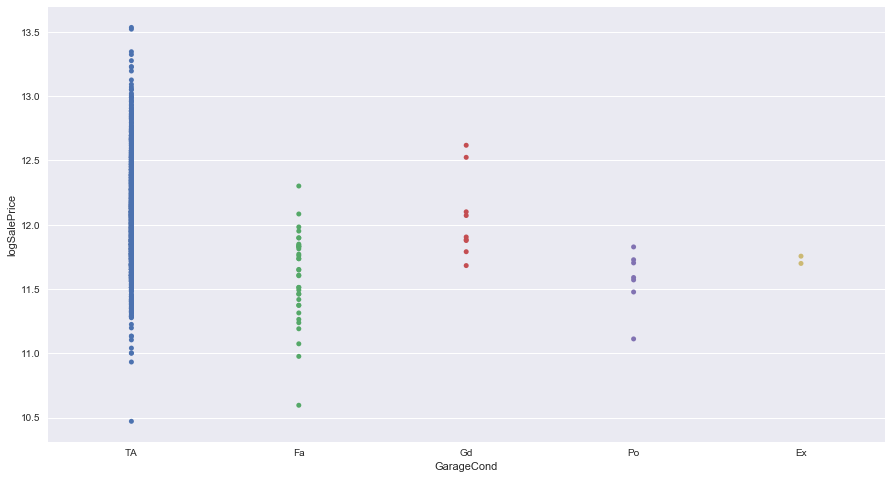

In [92]:
sns.stripplot(x="GarageCond", y="logSalePrice", data=df_train)

Plotting MSZoning
Plotting Street
Plotting Alley
Plotting LotShape
Plotting LandContour
Plotting Utilities
Plotting LotConfig
Plotting LandSlope
Plotting Neighborhood
Plotting Condition1
Plotting Condition2
Plotting BldgType
Plotting HouseStyle
Plotting RoofStyle
Plotting RoofMatl
Plotting Exterior1st
Plotting Exterior2nd
Plotting MasVnrType
Plotting ExterQual
Plotting ExterCond
Plotting Foundation
Plotting BsmtQual
Plotting BsmtCond
Plotting BsmtExposure
Plotting BsmtFinType1
Plotting BsmtFinType2
Plotting Heating
Plotting HeatingQC
Plotting CentralAir
Plotting Electrical
Plotting KitchenQual
Plotting Functional
Plotting FireplaceQu
Plotting GarageType
Plotting GarageFinish
Plotting GarageQual
Plotting GarageCond
Plotting PavedDrive
Plotting PoolQC
Plotting Fence
Plotting MiscFeature
Plotting SaleType
Plotting SaleCondition
Done


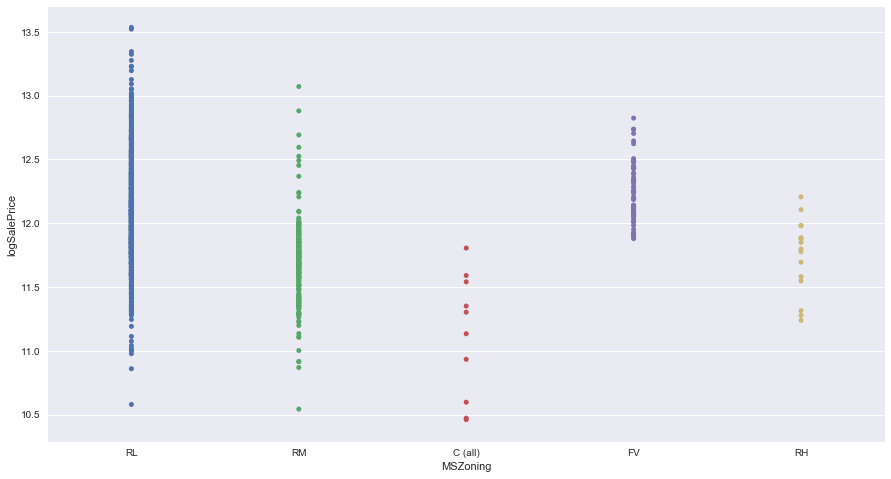

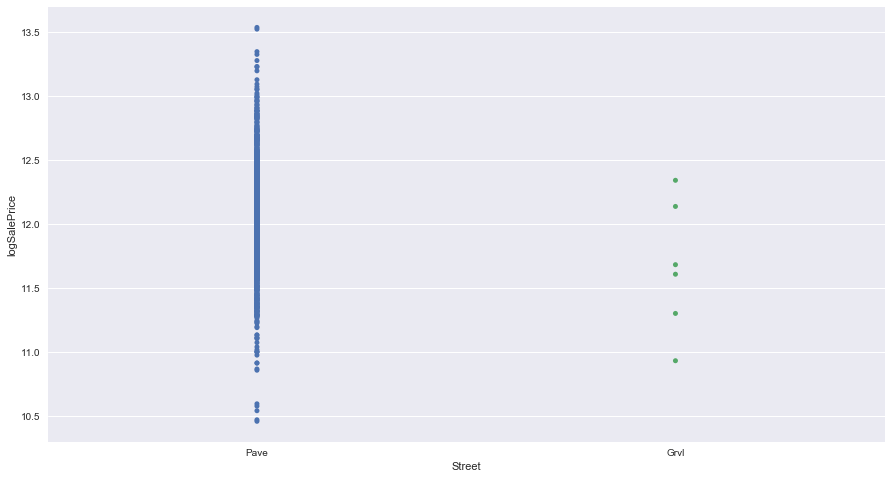

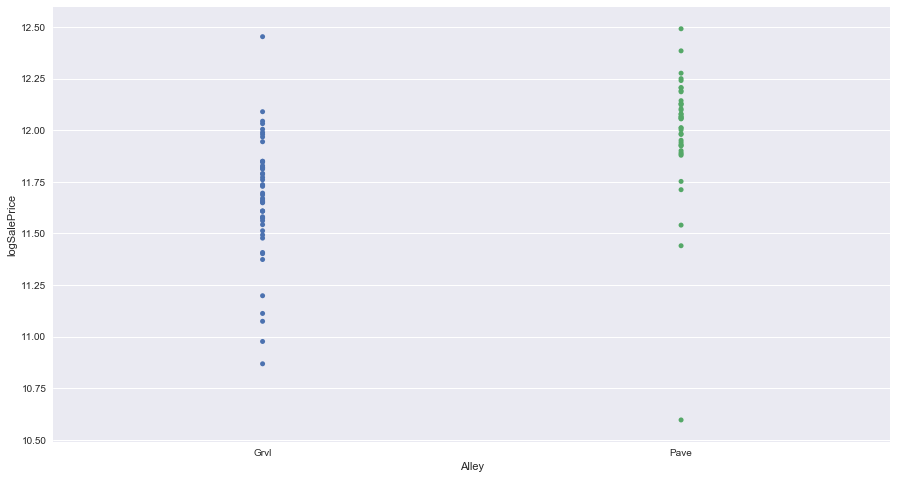

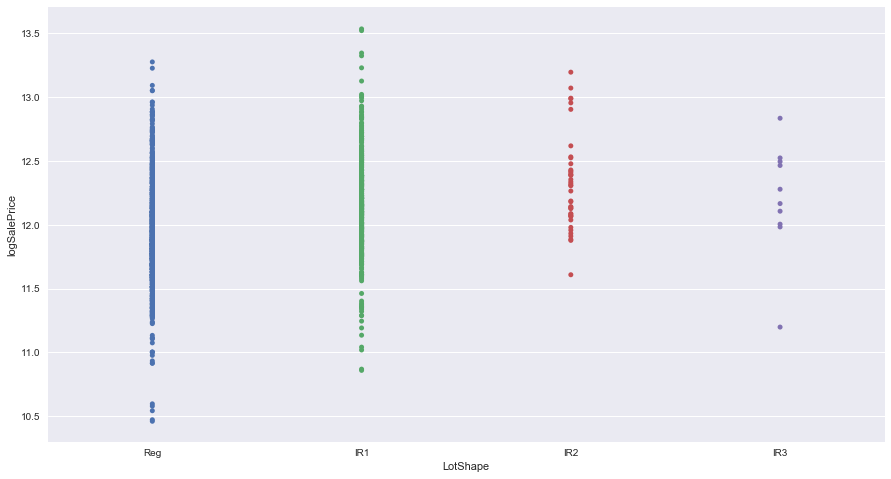

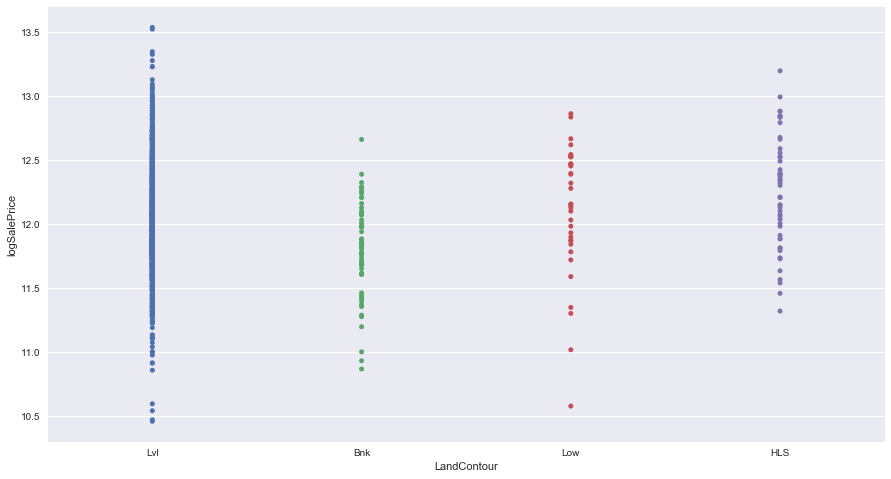

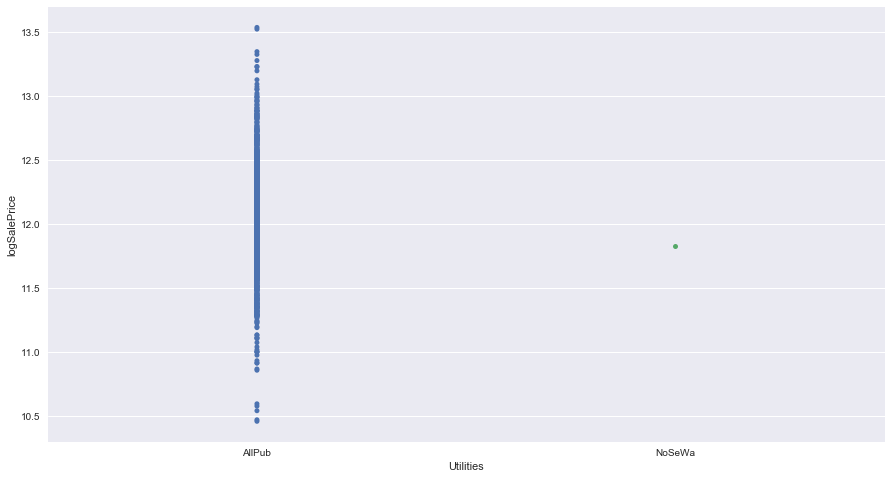

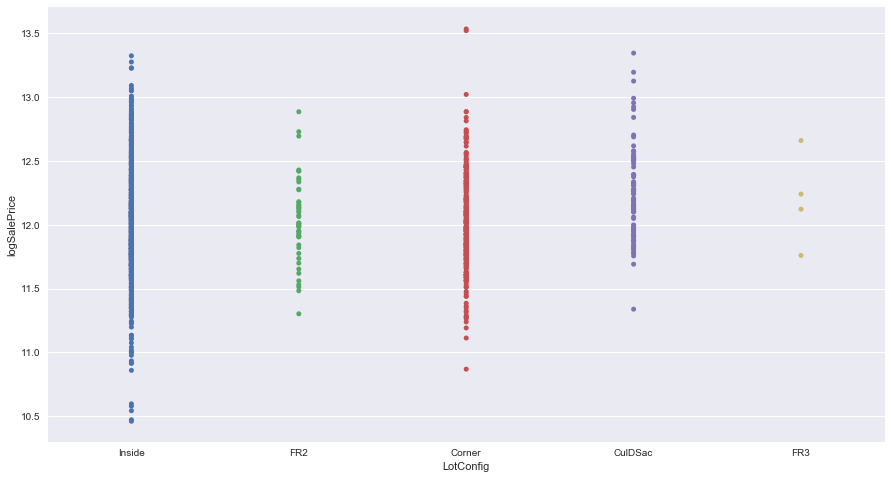

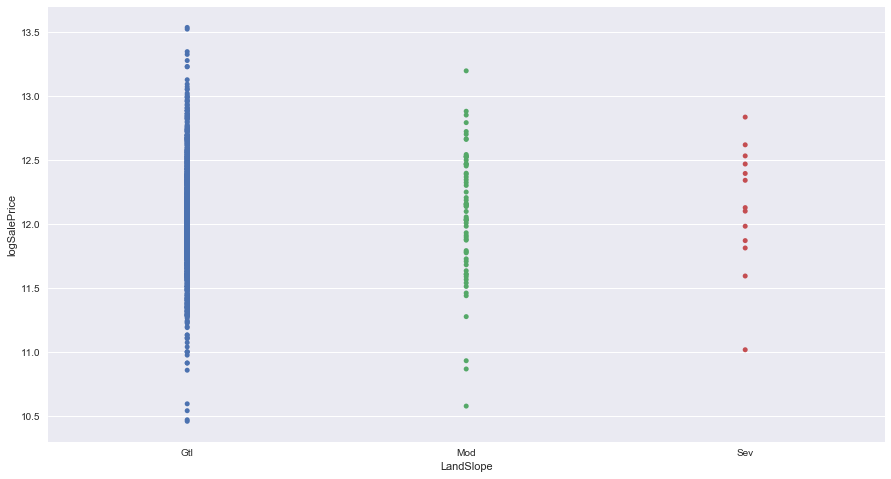

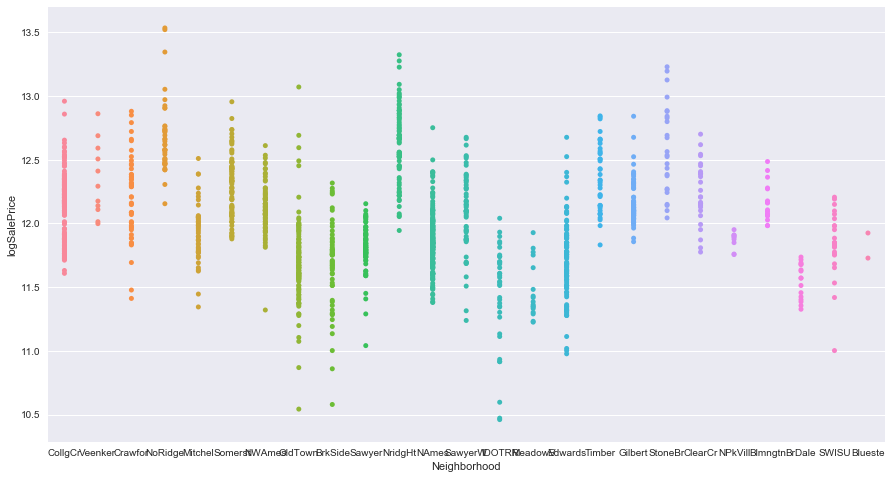

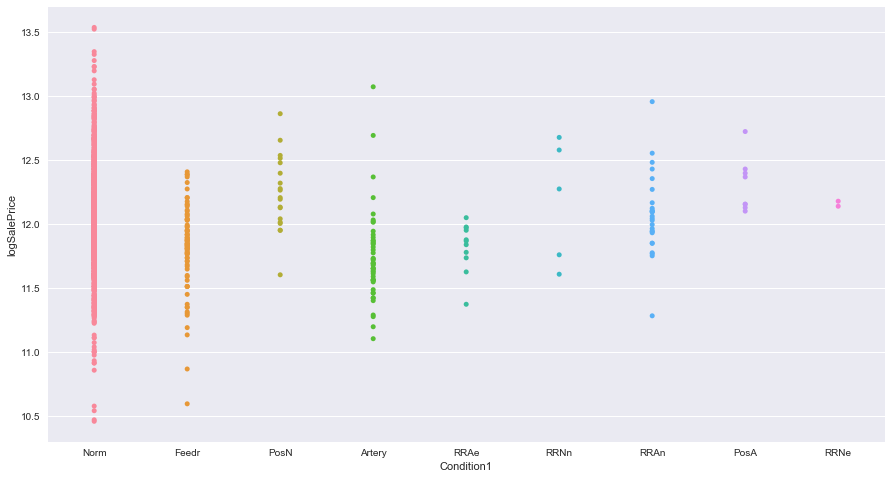

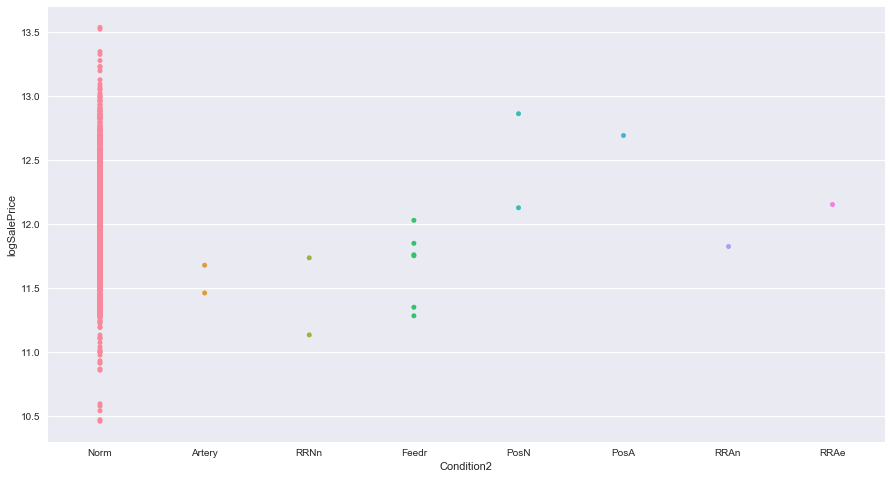

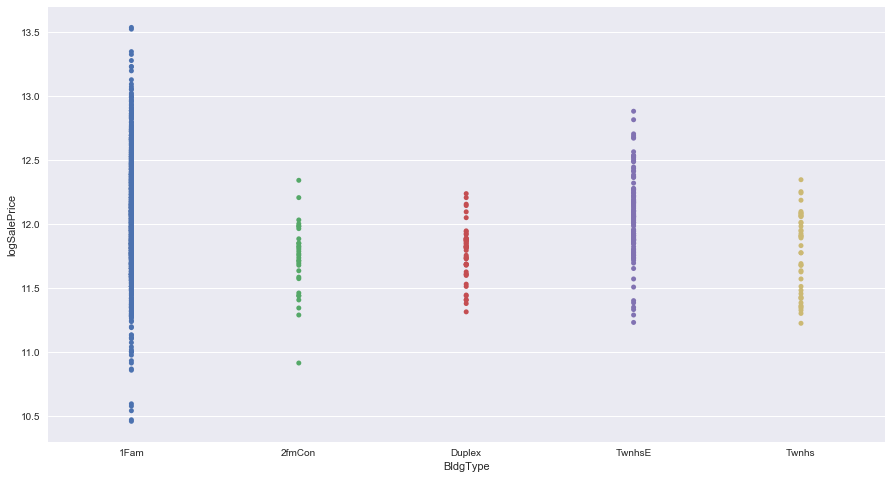

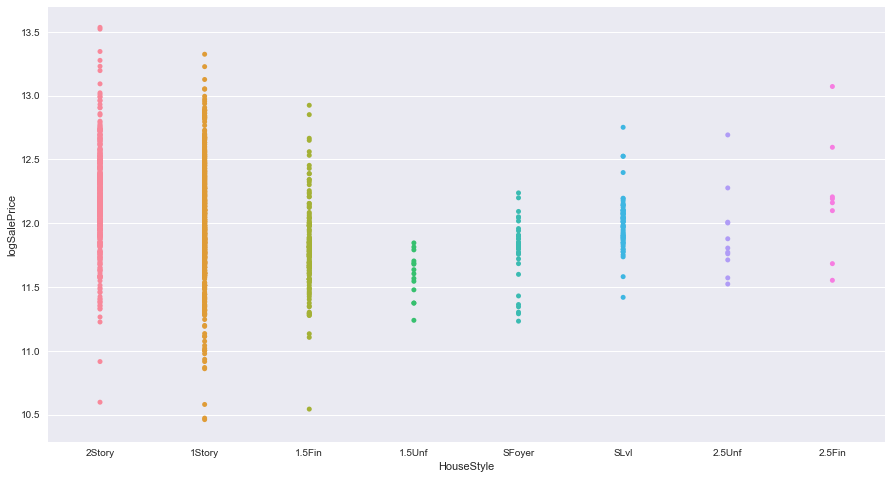

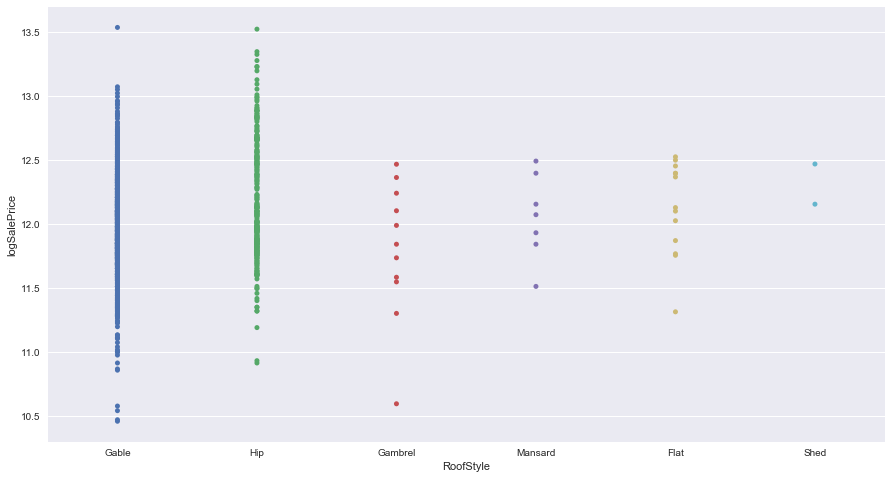

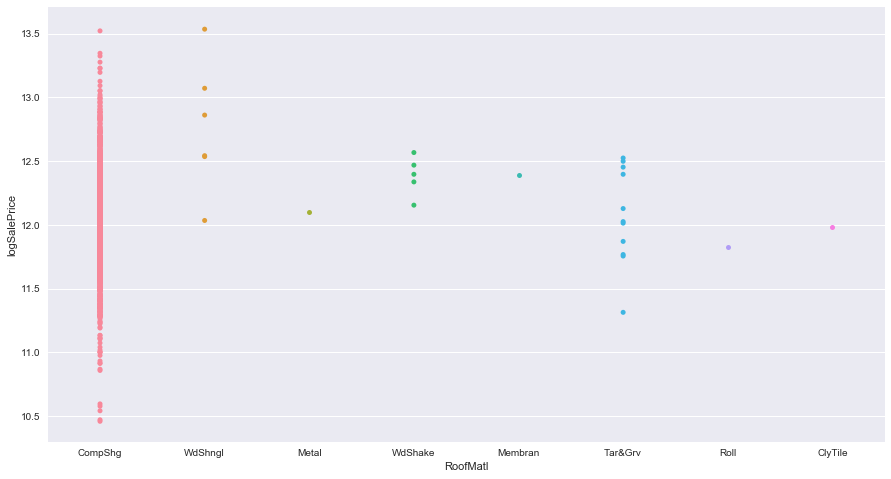

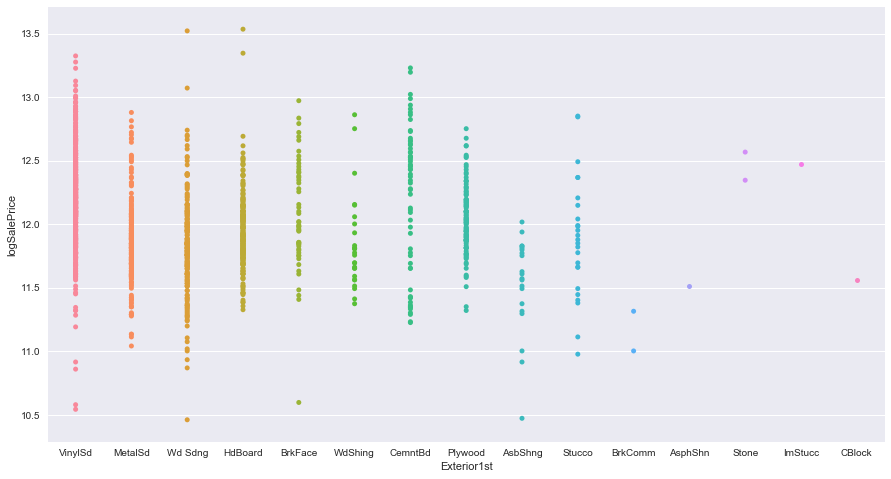

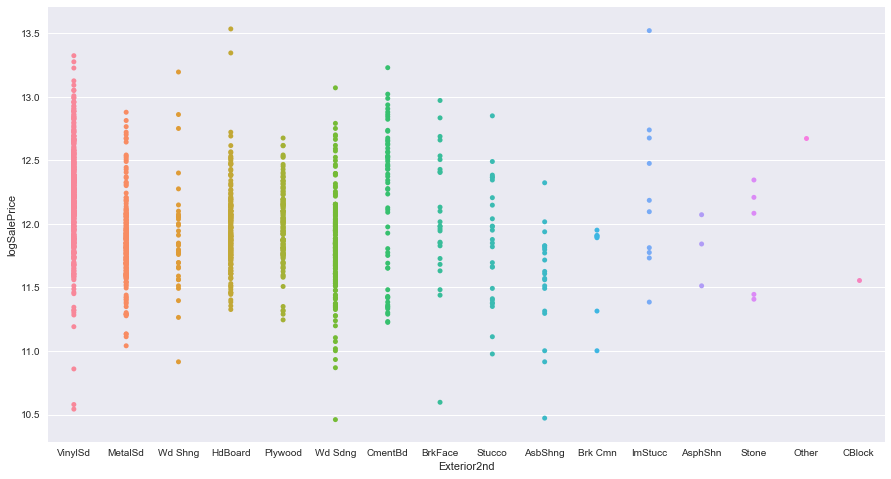

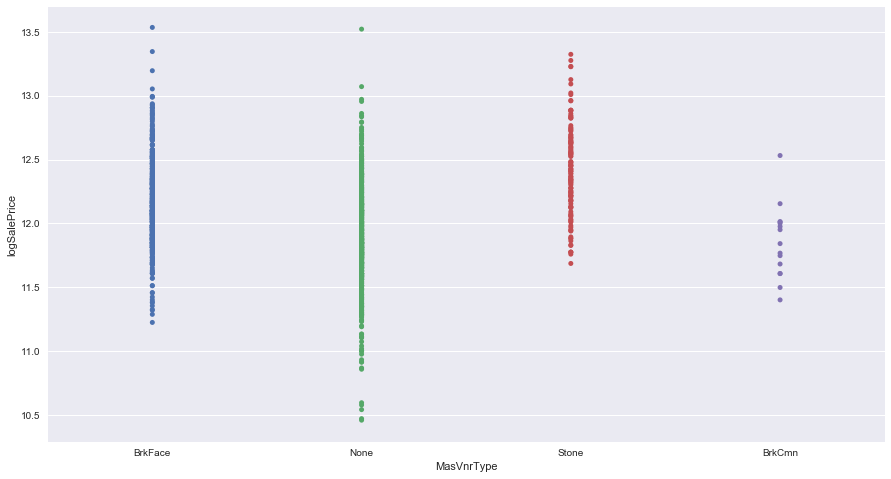

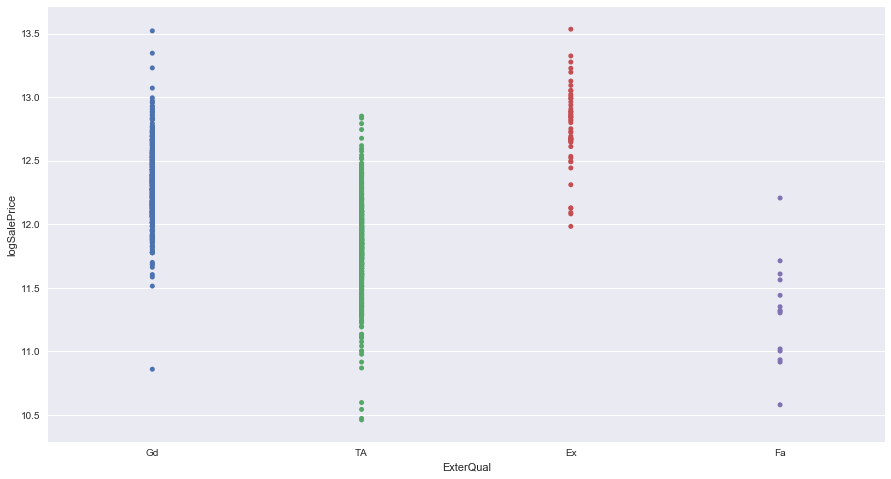

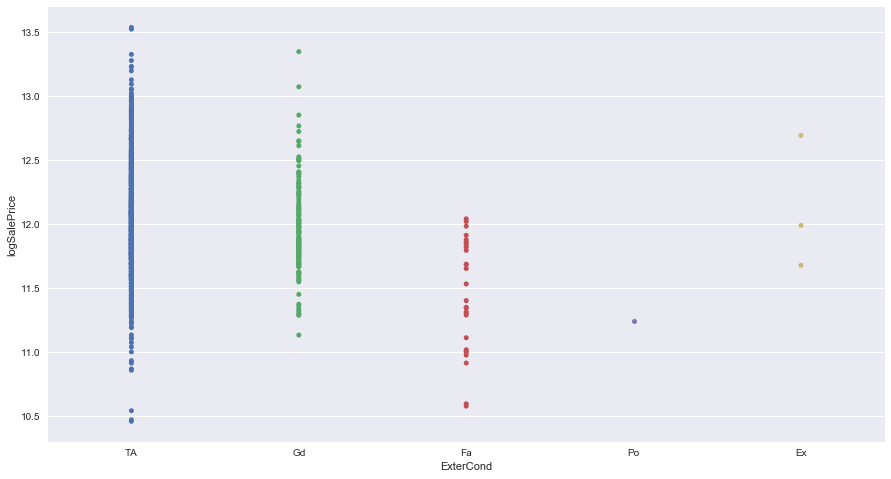

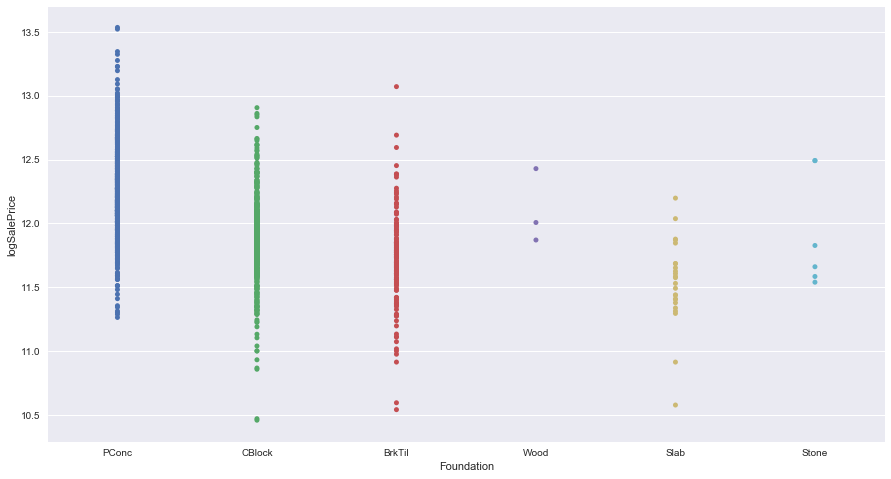

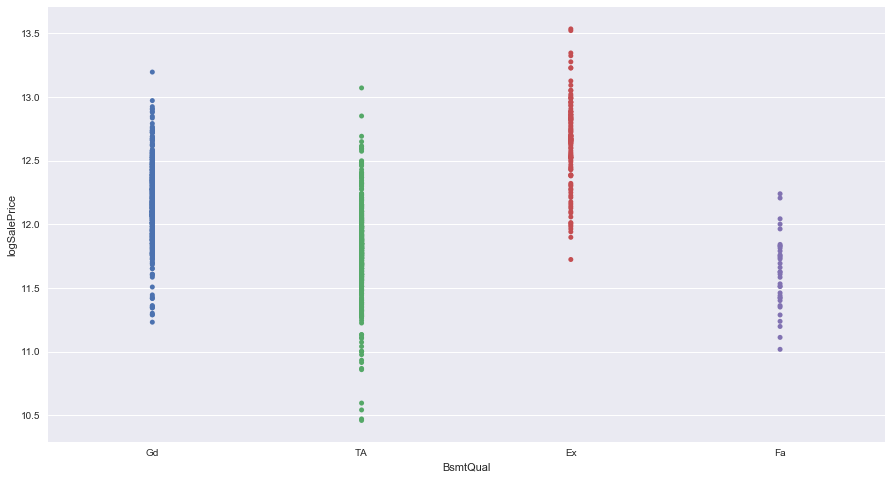

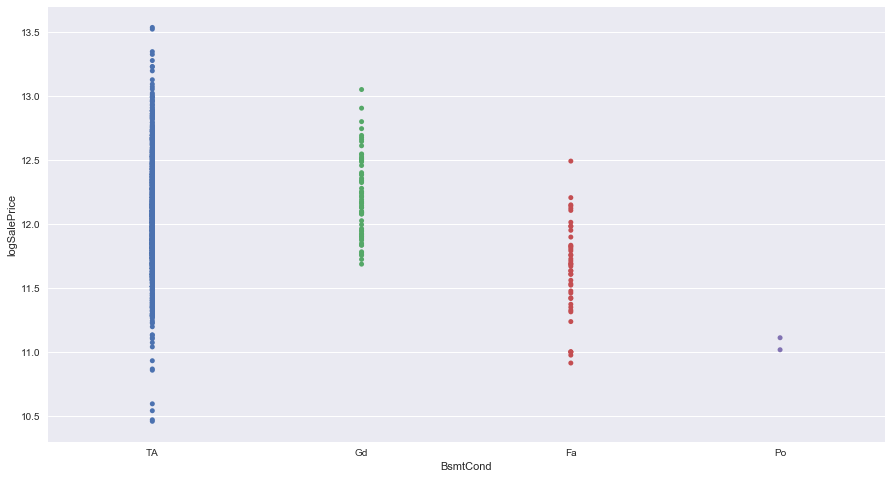

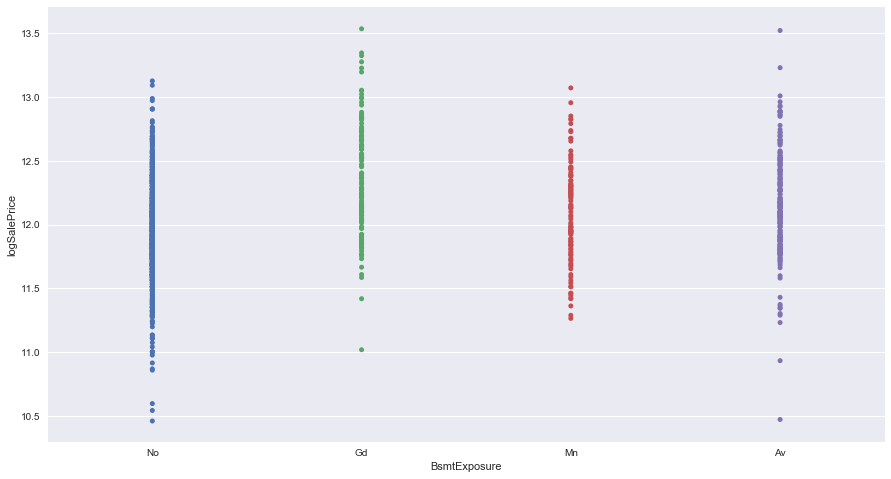

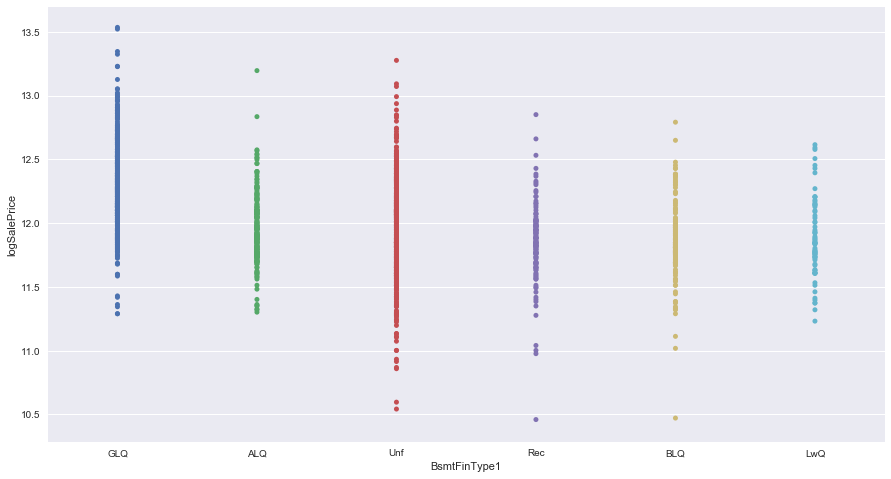

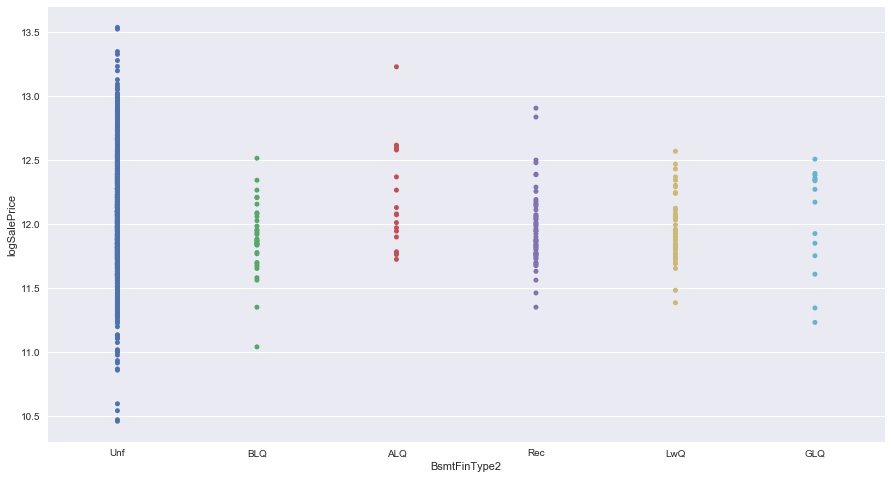

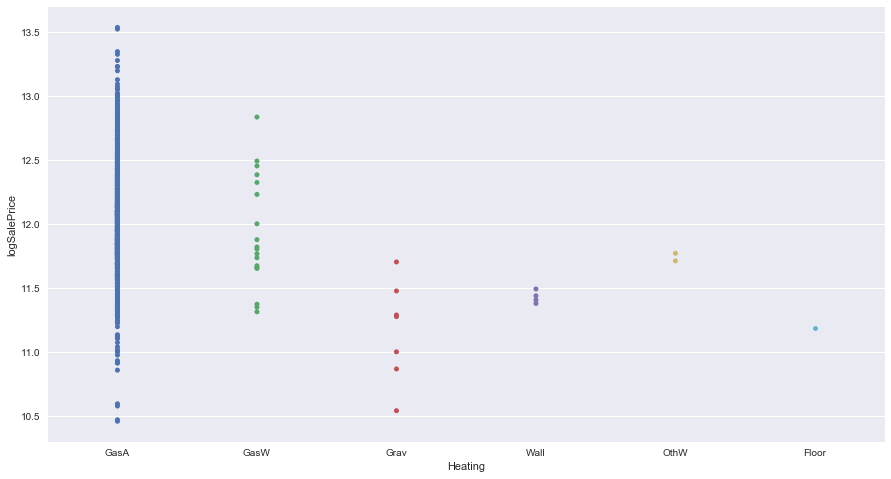

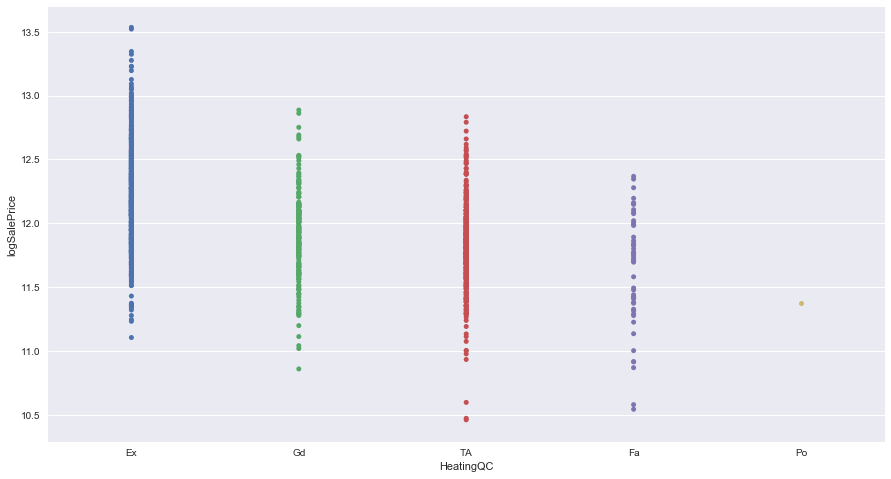

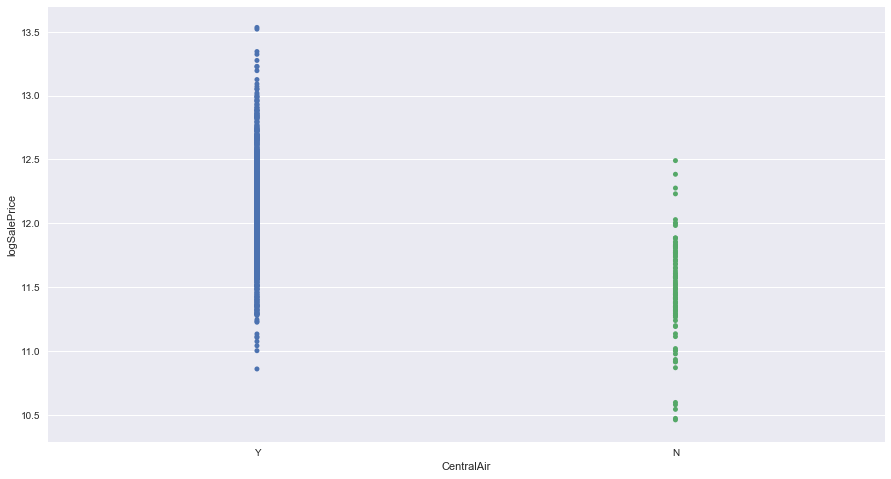

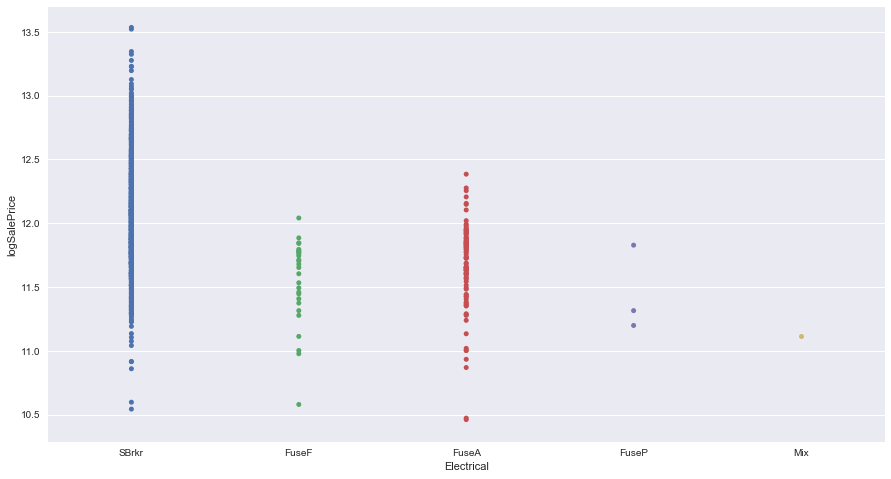

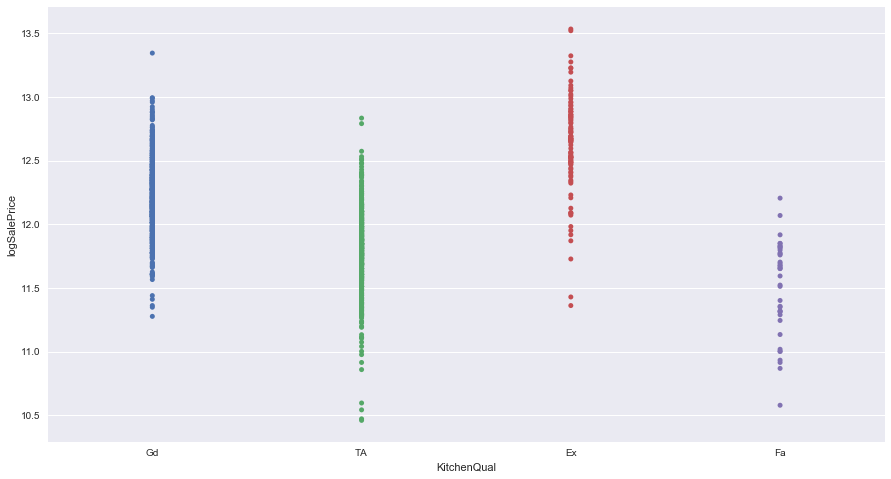

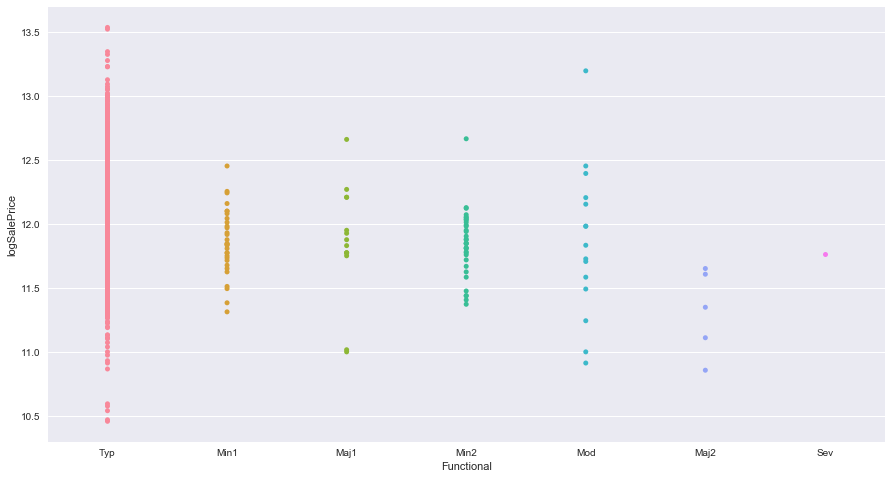

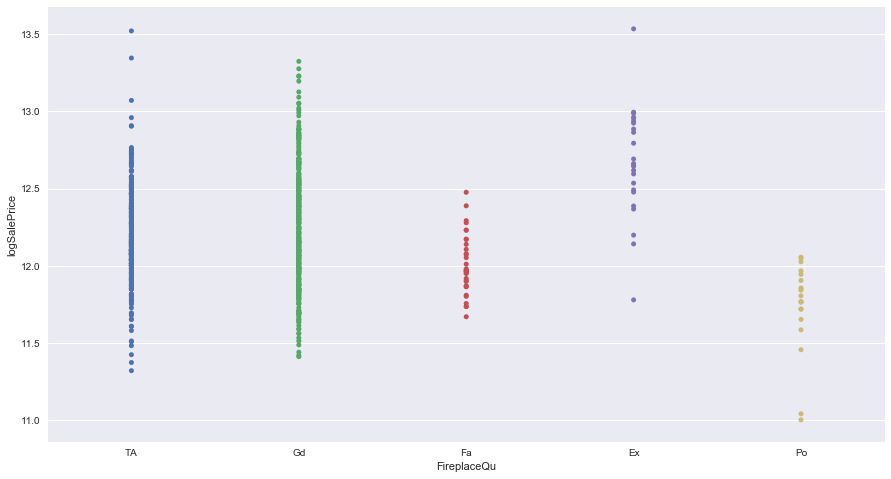

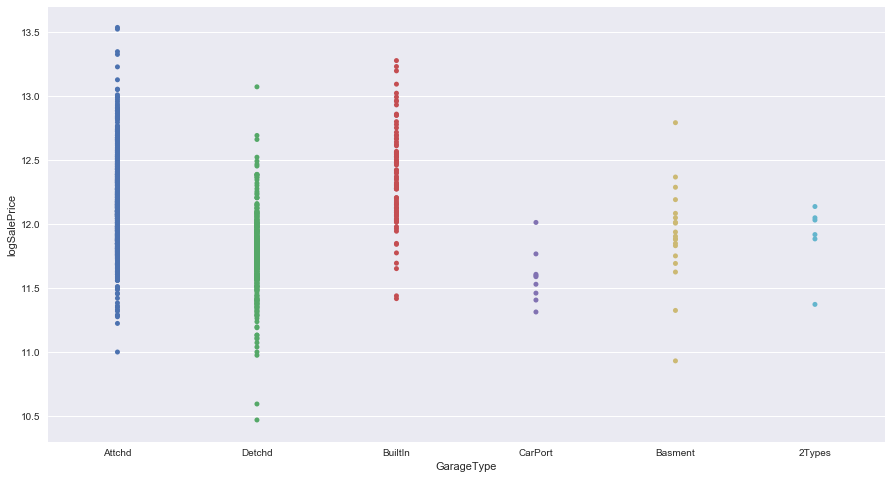

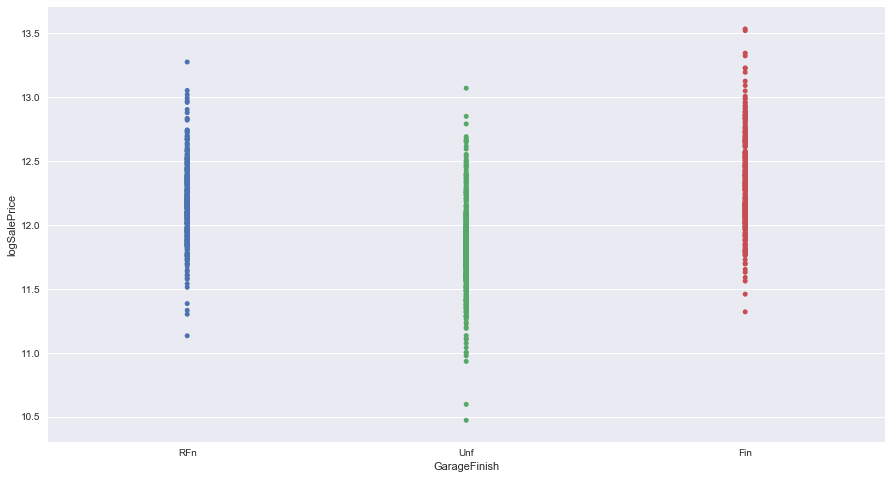

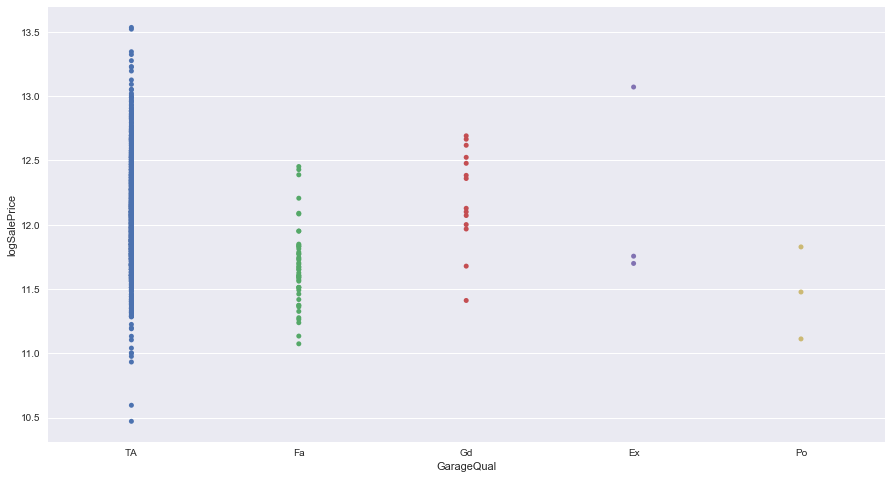

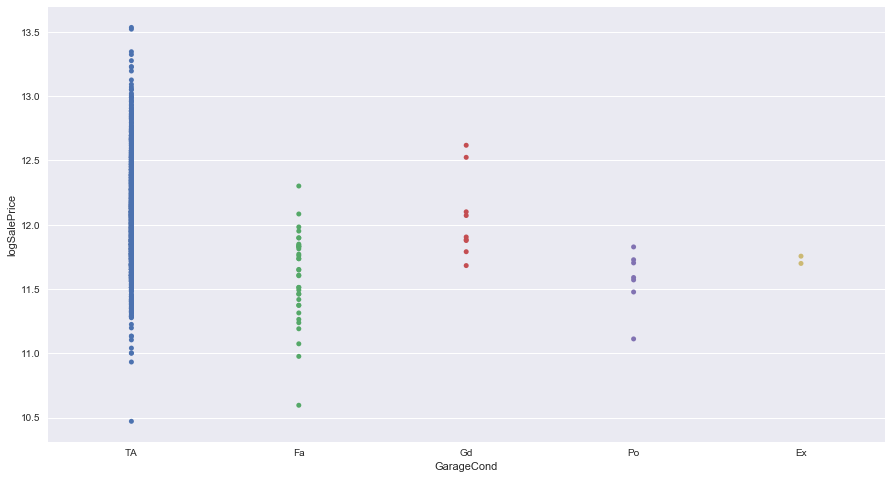

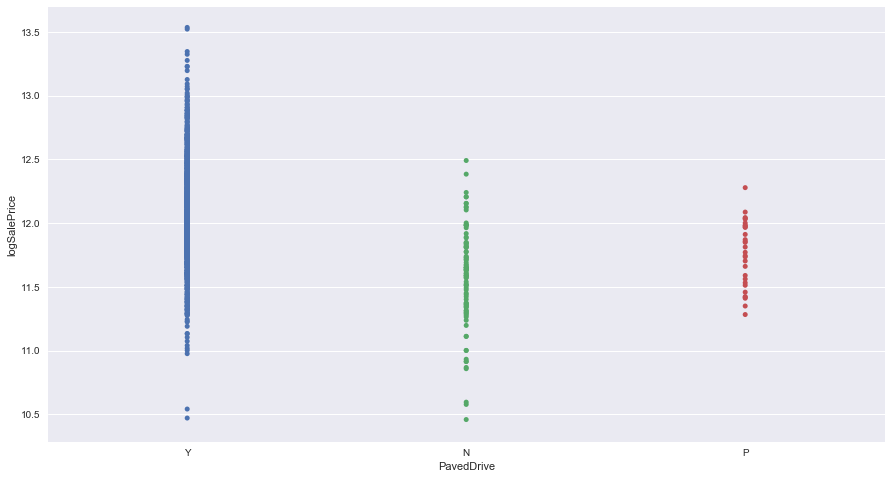

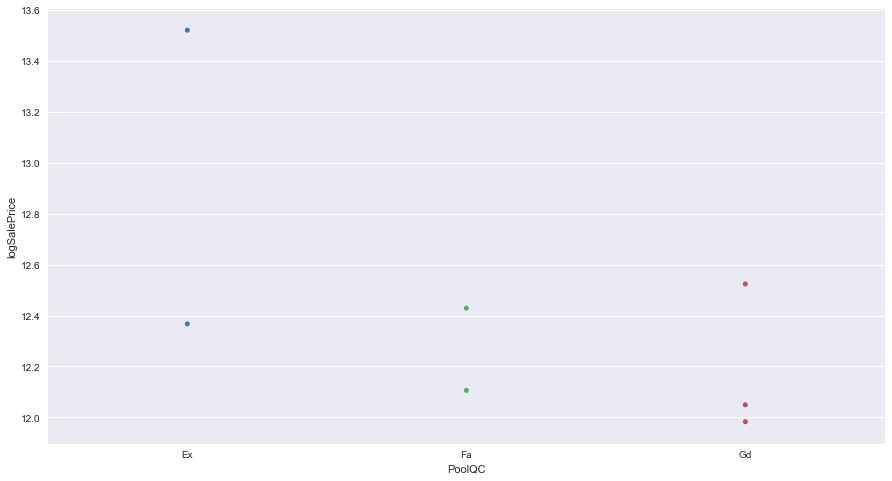

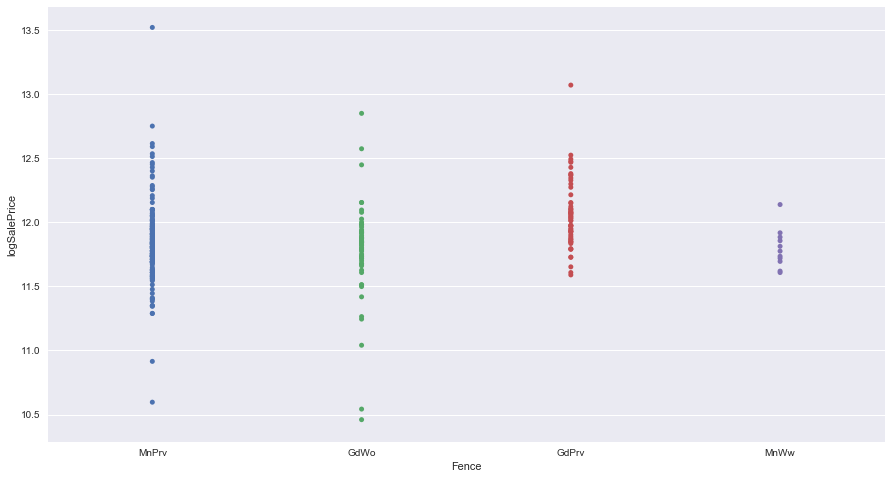

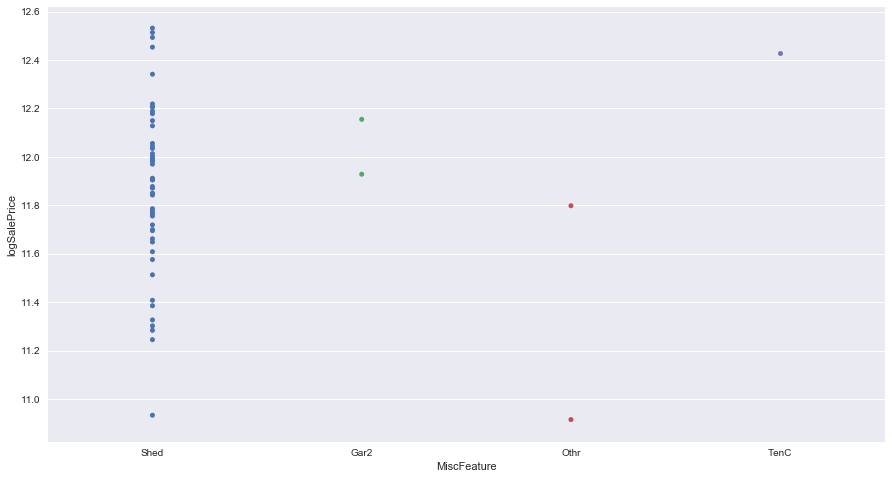

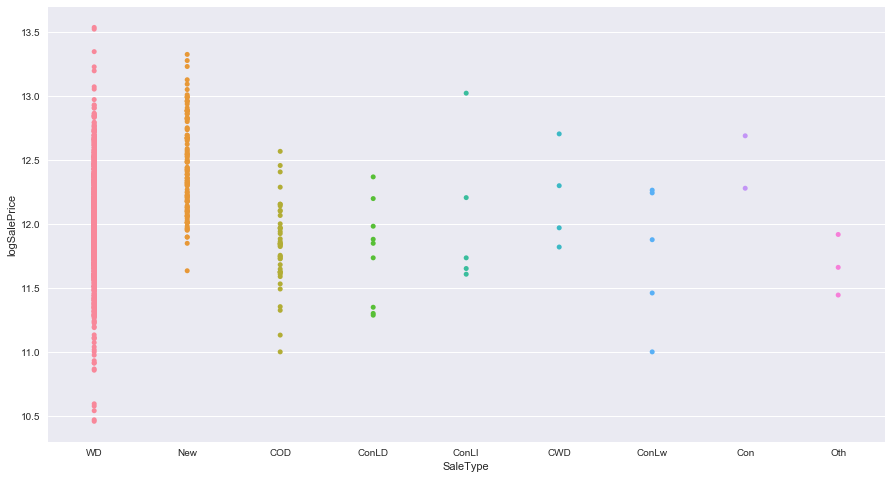

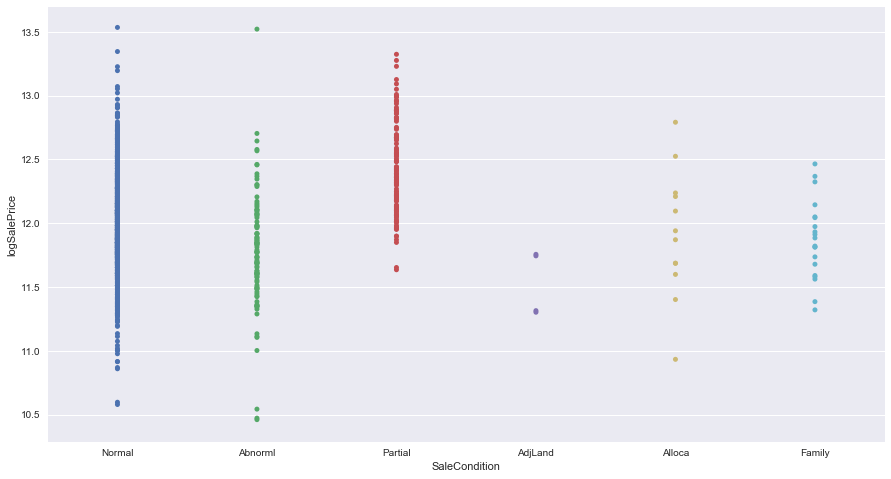

In [97]:
for categ_column in df_train_categorical.columns:
    print("Plotting {}".format(categ_column))
    plt.figure()
    sns.stripplot(x=categ_column, y="logSalePrice", data=df_train)
print("Done")

Plotting Id
Plotting MSSubClass
Plotting LotFrontage
Plotting LotArea
Plotting OverallQual
Plotting OverallCond
Plotting YearBuilt
Plotting YearRemodAdd
Plotting MasVnrArea
Plotting BsmtFinSF1
Plotting BsmtFinSF2
Plotting BsmtUnfSF
Plotting TotalBsmtSF
Plotting 1stFlrSF
Plotting 2ndFlrSF
Plotting LowQualFinSF
Plotting GrLivArea
Plotting BsmtFullBath
Plotting BsmtHalfBath
Plotting FullBath
Plotting HalfBath
Plotting BedroomAbvGr
Plotting KitchenAbvGr
Plotting TotRmsAbvGrd
Plotting Fireplaces
Plotting GarageYrBlt
Plotting GarageCars
Plotting GarageArea
Plotting WoodDeckSF
Plotting OpenPorchSF
Plotting EnclosedPorch
Plotting 3SsnPorch
Plotting ScreenPorch
Plotting PoolArea
Plotting MiscVal
Plotting MoSold
Plotting YrSold
Plotting SalePrice
Plotting logSalePrice
Done


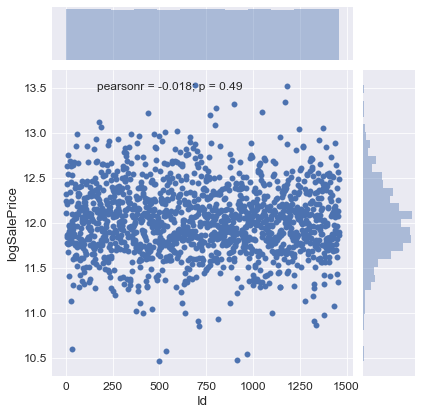

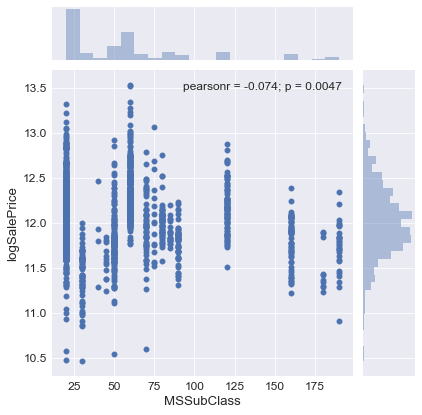

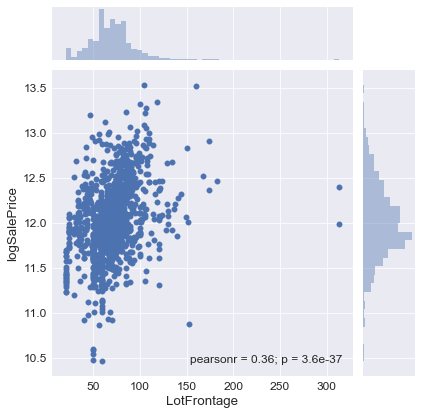

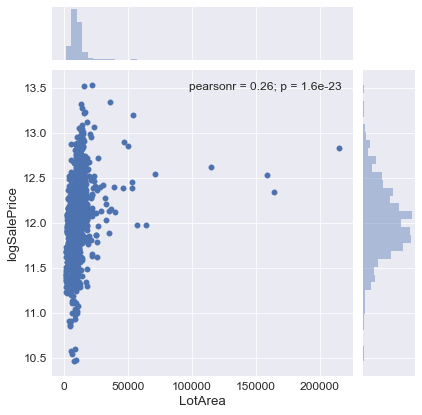

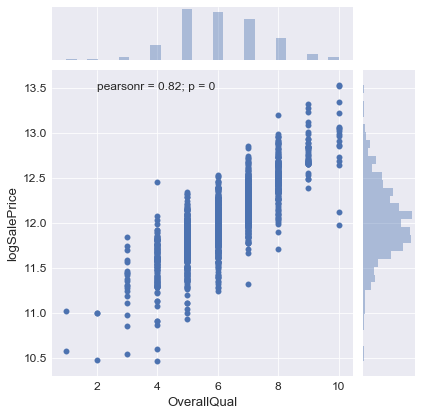

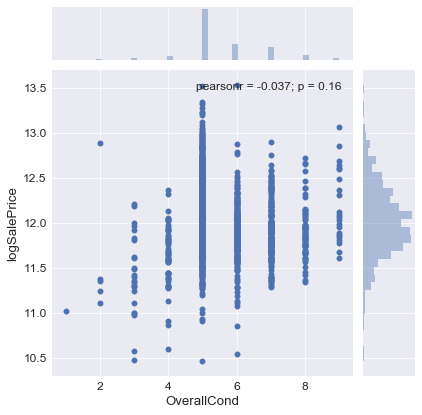

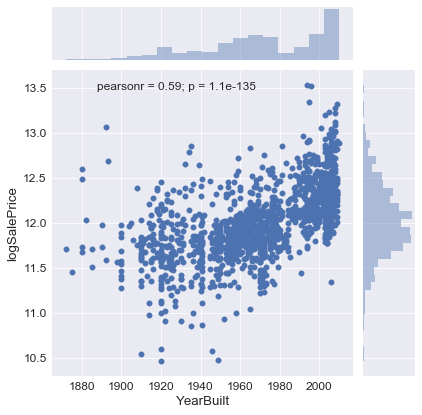

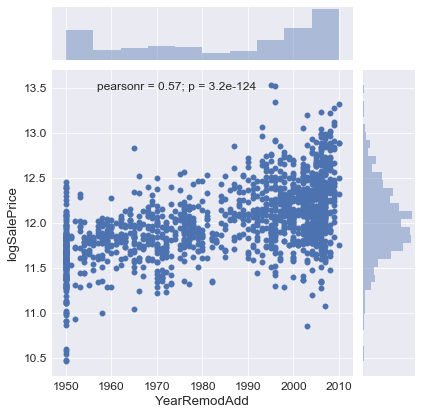

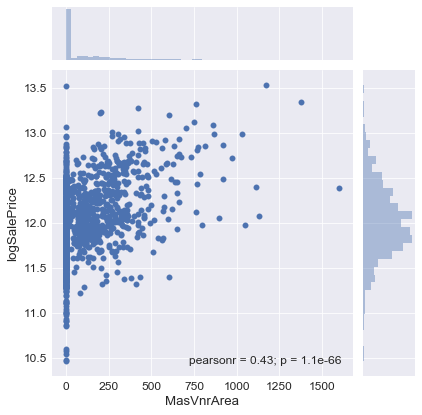

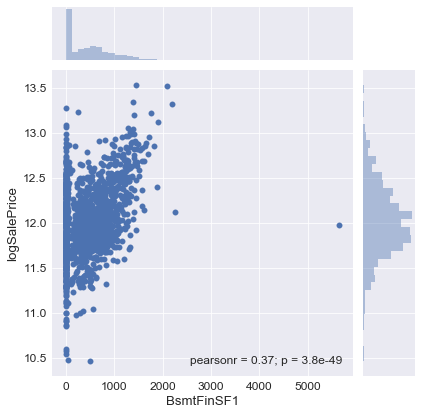

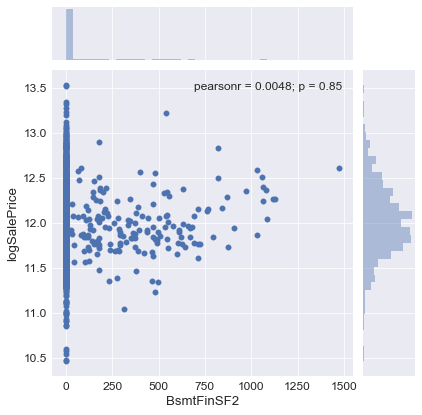

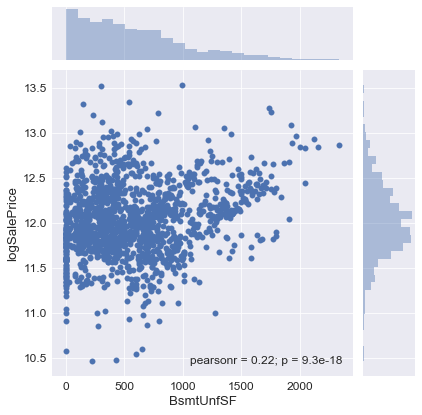

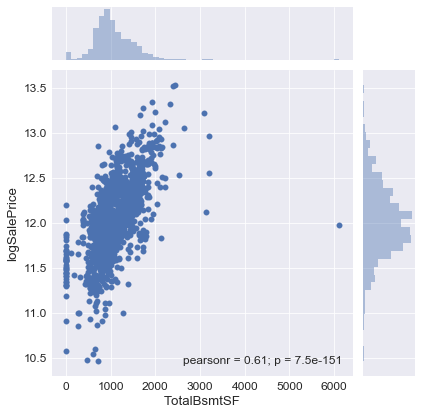

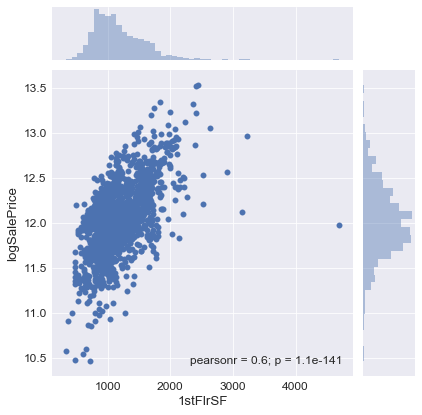

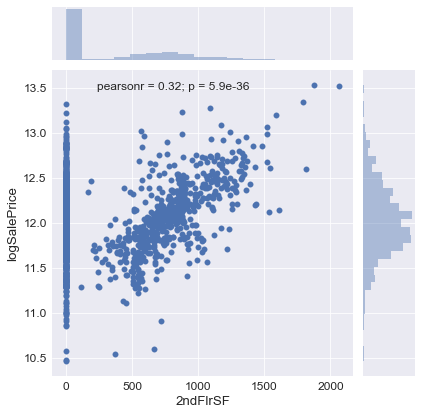

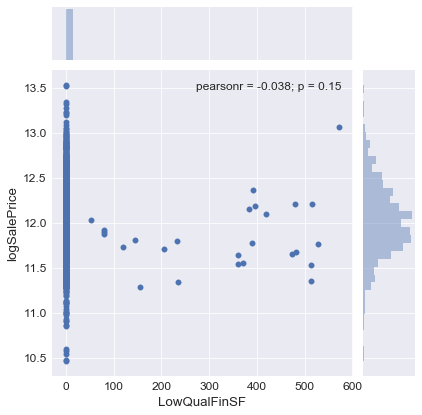

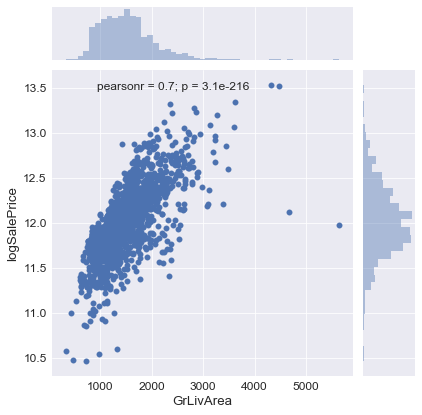

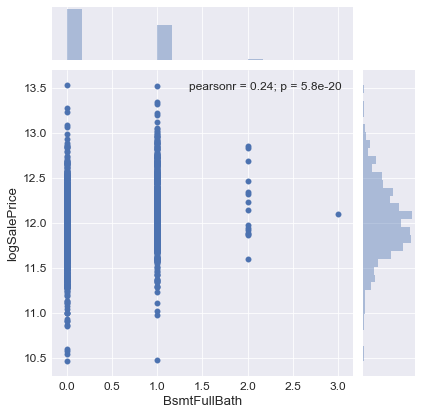

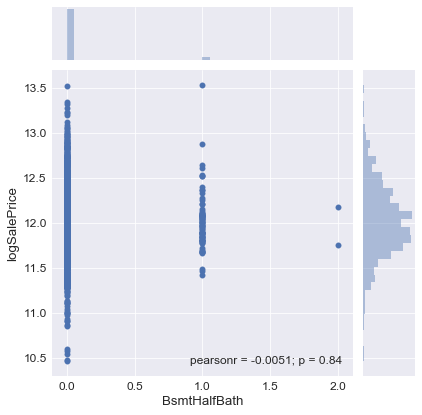

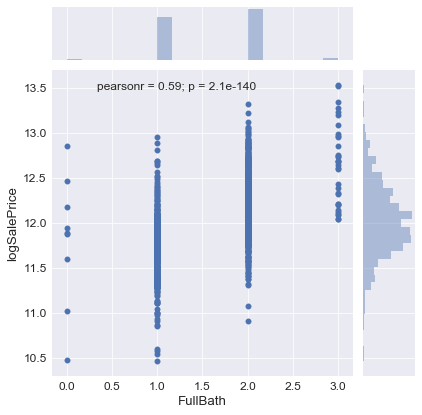

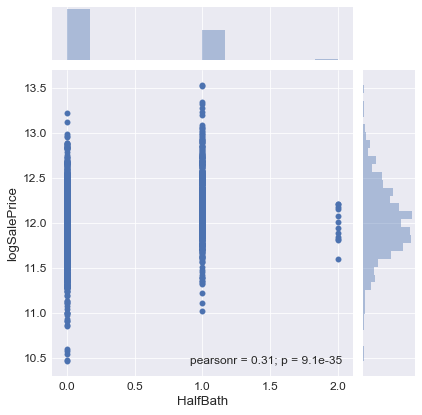

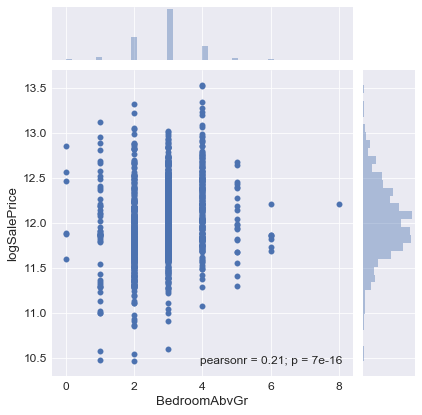

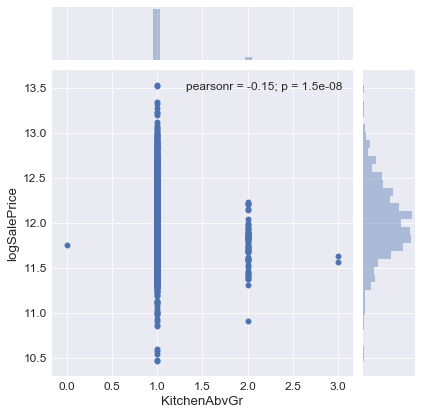

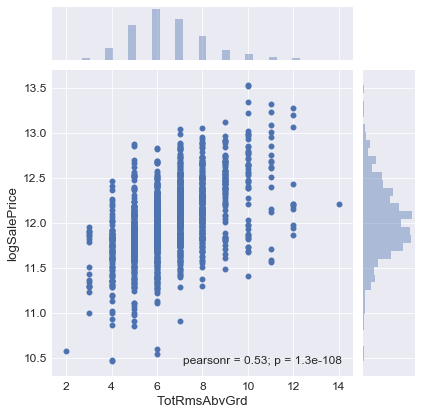

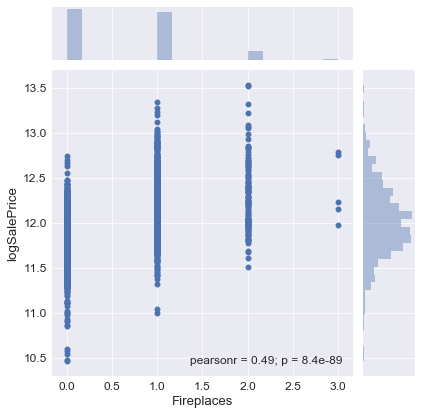

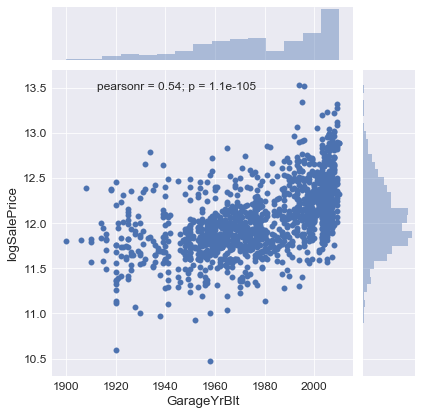

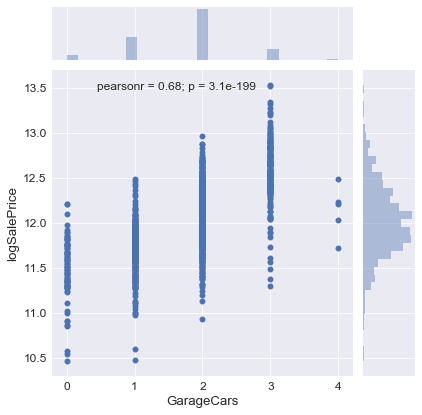

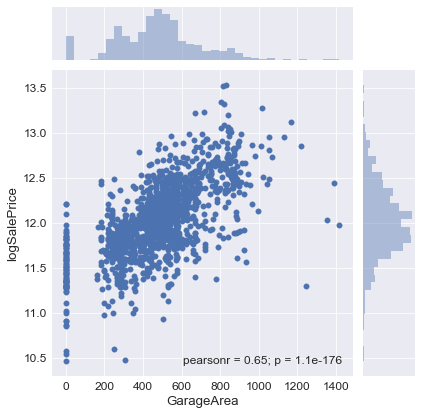

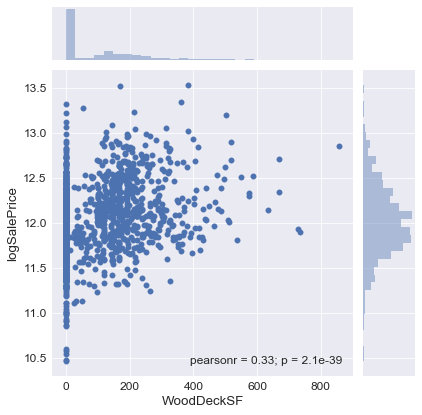

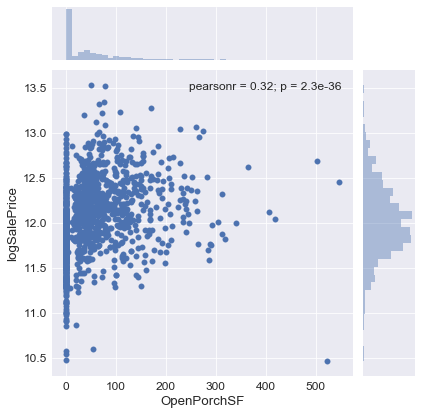

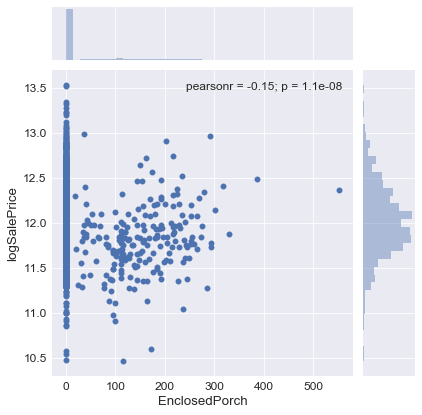

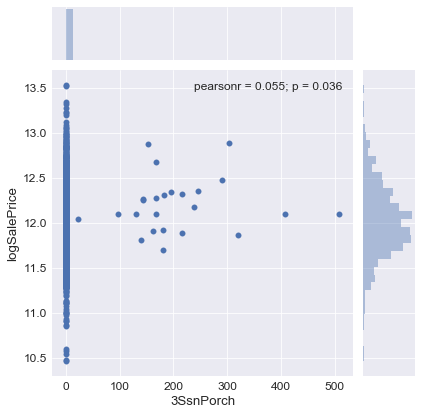

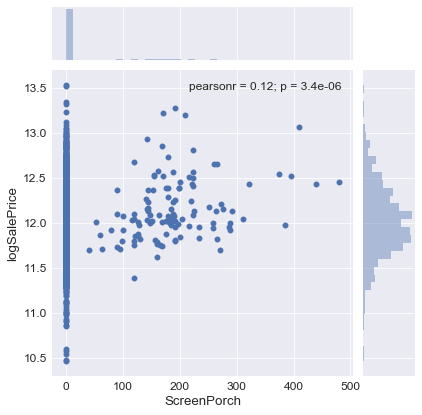

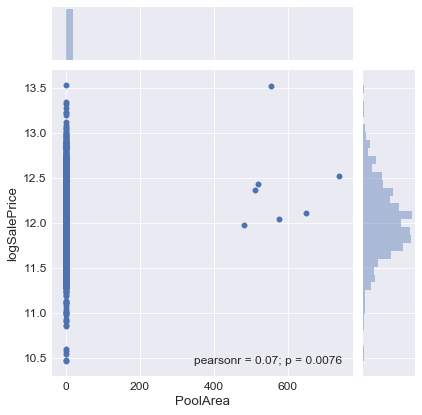

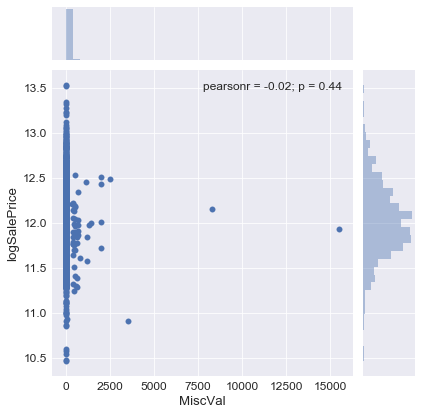

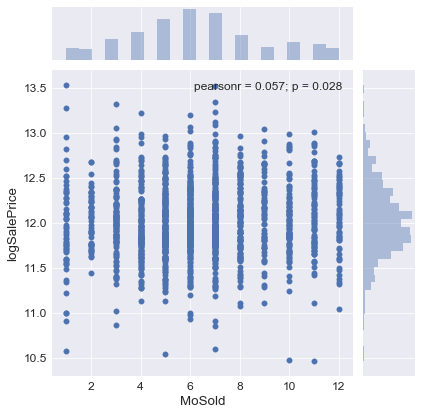

In [ ]:
for numeric_column in df_train_numeric.columns:
    print("Plotting {}".format(numeric_column))
    # sns.distplot(df_train[numeric_column])
    sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5, "figure.figsize": (15, 8)})
    sns.jointplot(x=numeric_column, y="logSalePrice", data=df_train)
print("Done")